This a notebook showing examples of how to use AnalyzeTrace.py package

DESCRIBE THE DATA SET AND THE PROJECT BLABLA........

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import poisson
import AnalyzeTrace as at
#import ndtest
import matplotlib.pyplot as plt
%matplotlib inline 
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.simulation\
    .psp_callibration import\
        PathwaySimulation,\
        TraceCollection,\
        ModelSimulationPSP
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.simulation\
    .psp_callibration.analysis import\
        PspAmplitudeAnalysis,\
        PspTraceAnalysis
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.simulation\
    .psp_callibration.simulation import\
        Adapter

In [2]:
import yaml

def path_project(number=83):
    return os.path.join(
        "/gpfs/bbp.cscs.ch/project",
        "proj{}".format(number))
 
def path_traces(
        pathway,
        proj_number=83,
        psp_dir=os.path.join(
            "validation", "psp-validation")):
    return os.path.join(
        path_project(proj_number),
        psp_dir,
        pathway)

def paths_pathways(
    pathway_type="primary",
    proj_number=83,
    psp_dir=os.path.join(
        "validation", "psp-validation")):
    return os.path.join(
        path_project(proj_number),
        psp_dir,
        "pathways",
        pathway_type)

    
RAW_DATA_PATH = '/Users/natalibarros/Desktop/EPFL_BBP/MVR_warmupProject/Data_h5_files/invitro_raw.h5'

In [3]:
pspsim_model =\
    ModelSimulationPSP(
        path_simulation_data=os.path.join(
            path_project(83),
            "validation",
            "psp-validation"))

In [4]:
print(pspsim_model.path_simulation_traces)
print(pspsim_model.read_pathway_types())
print(70 * '=')
pathways = pspsim_model.pathways
print(pathways)

/gpfs/bbp.cscs.ch/project/proj83/validation/psp-validation/output
{'L23_NBC-L23_PC': 'primary', 'L5_PC-L5_BC': 'primary', 'L6_IPC-L6_BPC': 'primary', 'L23_LBC-L23_PC': 'primary', 'L6_TPC-L6_BC': 'primary', 'L6_TPC-L6_TPC': 'primary', 'L6_TPC-L6_BPC': 'primary', 'L5_TTPC-L5_TTPC': 'primary', 'L4_SS-L23_PC': 'primary', 'L6_IPC-L6_IPC': 'primary', 'L23_NBC_LBC-L23_PC': 'primary', 'L4_EXC-L4_EXC': 'primary', 'L23_PC-L23_PC': 'primary', 'L5_TTPC-L5_MC': 'primary', 'L6_IPC-L6_BC': 'primary', 'L5_STPC-L5_STPC': 'primary', 'L5_MC-L5_TTPC': 'primary', 'L6_IPC-L6_MC': 'primary', 'L23_BC-L23_PC': 'primary', 'L6_TPC-L6_MC': 'primary', 'EXC-INH_OTHER': 'secondary', 'EXC-MC': 'secondary', 'BC-EXC': 'secondary', 'PV_FS-EXC': 'secondary', 'MC-EXC': 'secondary', 'DISTAR_INH-EXC': 'secondary', 'TC-L4_EXC': 'projection', 'TC-L5_EXC': 'projection'}
['L6_TPC-L6_BC', 'L5_STPC-L5_STPC', 'L6_IPC-L6_BC', 'L6_TPC-L6_MC', 'L4_EXC-L4_EXC', 'L6_TPC-L6_TPC', 'L5_TTPC-L5_TTPC', 'L6_IPC-L6_IPC', 'L5_PC-L5_BC', 'L6_TP

In [5]:
pspsim_model\
    .simulation_data(pathways[0])\
    .traces\
    .head()

100%|██████████| 40/40 [00:48<00:00,  1.22s/it]


time    voltage
connection       trial record_step                 
a787881-a1001485 0     0             0.0 -70.000000
                       1             0.1 -70.018165
                       2             0.2 -70.029240
                       3             0.3 -70.037444
                       4             0.4 -70.043985

In [5]:
pspsim_model\
    .simulation_data(pathways[0])\
    .amplitudes\
    .head()

0    2.646888
1    1.333252
2    0.000278
3    0.456588
4    0.998737
Name: amplitude, dtype: float64

In [6]:
pspsim_model\
    .simulation_data(pathways[0])\
    .summary_amplitude\
    .reference

mean    2.20
std     3.28
dtype: float64

In [23]:
adapter = Adapter()
analysis_pspamp = PspAmplitudeAnalysis()

pathways = adapter.get_pathways(pspsim_model)
print(pathways)

amplitudes = adapter.get_amplitudes(pspsim_model, pathway=pathways[0])
print(amplitudes.head())

m = analysis_pspamp.get_measurement(pspsim_model, adapter)
m["data"].groupby(["dataset", "pathway"])\
         .agg(["size", "mean", "std",
               ("spikes", lambda df: pd.isna(df).sum())])
#analysis_pspamp.figures(m)(m)

 25%|██▌       | 5/20 [00:00<00:00, 45.03it/s]

['L6_TPC-L6_BC', 'L5_STPC-L5_STPC', 'L6_IPC-L6_BC', 'L6_TPC-L6_MC', 'L4_EXC-L4_EXC', 'L6_TPC-L6_TPC', 'L5_TTPC-L5_TTPC', 'L6_IPC-L6_IPC', 'L5_PC-L5_BC', 'L6_TPC-L6_BPC', 'L23_BC-L23_PC', 'L6_IPC-L6_BPC', 'L5_MC-L5_TTPC', 'L23_LBC-L23_PC', 'L4_SS-L23_PC', 'L5_TTPC-L5_MC', 'L23_PC-L23_PC', 'L23_NBC_LBC-L23_PC', 'L6_IPC-L6_MC', 'L23_NBC-L23_PC']
0    2.646888
1    1.333252
2    0.000278
3    0.456588
4    0.998737
Name: amplitude, dtype: float64


100%|██████████| 20/20 [00:00<00:00, 53.23it/s]


psp_amplitudes                      \
                                                   size      mean       std   
dataset               pathway                                                 
BlueBrainCircuitModel L23_BC-L23_PC                  40  1.447915  1.143418   
                      L23_LBC-L23_PC                 40  1.635650  1.618986   
                      L23_NBC-L23_PC                 40  1.358363  1.286045   
                      L23_NBC_LBC-L23_PC             40  1.380558  0.928039   
                      L23_PC-L23_PC                  40  0.553775  0.405373   
                      L4_EXC-L4_EXC                  40  1.642764  1.106569   
                      L4_SS-L23_PC                   40  0.730152  0.572975   
                      L5_MC-L5_TTPC                  40  1.222627  1.009154   
                      L5_PC-L5_BC                    40  2.416373  2.963676   
                      L5_STPC-L5_STPC                40  0.635874  0.755823   
                      L5_TTPC-L5_MC                  40  0.326737  0.321999   
                      L5_TTPC-L5_TTPC                40  1.509859  1.255106   
                      L6_IPC-L6_BC                   40  2.048705  1.326924   
                      L6_IPC-L6_BPC                  40  1.211020  0.759909   
                      L6_IPC-L6_IPC                  40  1.333956  0.987617   
                      L6_IPC-L6_MC                   40  0.181981  0.164539   
                      L6_TPC-L6_BC                   40  2.217992  1.424933   
                      L6_TPC-L6_BPC                  40  0.802506  0.868518   
                      L6_TPC-L6_MC                   40  0.204472  0.230584   
                      L6_TPC-L6_TPC                  40  1.147833  1.001424   

                                                 
                                         spikes  
dataset               pathway                    
BlueBrainCircuitModel L23_BC-L23_PC         0.0  
                      L23_LBC-L23_PC        0.0  
                      L23_NBC-L23_PC        0.0  
                      L23_NBC_LBC-L23_PC    0.0  
                      L23_PC-L23_PC         0.0  
                      L4_EXC-L4_EXC         5.0  
                      L4_SS-L23_PC          0.0  
                      L5_MC-L5_TTPC         0.0  
                      L5_PC-L5_BC           2.0  
                      L5_STPC-L5_STPC       0.0  
                      L5_TTPC-L5_MC         0.0  
                      L5_TTPC-L5_TTPC       0.0  
                      L6_IPC-L6_BC          5.0  
                      L6_IPC-L6_BPC         2.0  
                      L6_IPC-L6_IPC         0.0  
                      L6_IPC-L6_MC          0.0  
                      L6_TPC-L6_BC          3.0  
                      L6_TPC-L6_BPC         0.0  
                      L6_TPC-L6_MC          0.0  
                      L6_TPC-L6_TPC         2.0

In [212]:
print(pathways[1])
traces =\
    pspsim_model.simulation_data(pathways[1])\
                .traces
amplitudes =\
    traces.voltage\
          .groupby(["connection", "trial"])\
          .agg([("max_voltage", lambda df: df.max())])\
          .assign(spike=lambda df: df.max_voltage > -0.20,
                 amplitude=lambda df: df.max_voltage + 70.)
print(
    amplitudes[amplitudes.spike]\
        .max_voltage\
        .min())
print(
    amplitudes[np.logical_not(amplitudes.spike.values)]\
        .max_voltage\
        .max())
traces.head()

L5_STPC-L5_STPC
31.31835859907234
-62.06117588467306


time    voltage
connection        trial record_step                 
a1546589-a1555115 0     0             0.0 -69.000000
                        1             0.1 -68.822159
                        2             0.2 -68.735040
                        3             0.3 -68.676406
                        4             0.4 -68.632478

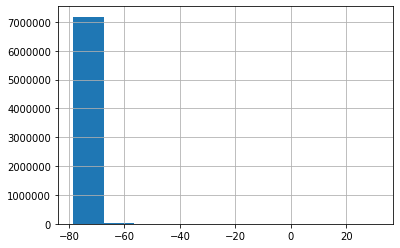

In [194]:
traces.voltage.hist()

In [188]:
spike =\
    traces.voltage\
          .groupby(["connection", "trial"])\
          .agg([("max_voltage", "max")])\
          .assign(spike=lambda df: df.max_voltage > -20.)\
          .spike
non_spiky_connection_trials =\
    spike.index[np.logical_not(spike.values)]

In [199]:
spike.head()

connection         trial
a1546589-a1555115  0        False
                   1        False
                   2        False
                   3        False
                   4        False
Name: spike, dtype: bool

In [190]:
non_spiky_traces =\
    traces.reset_index()\
          .set_index(["connection", "trial"])\
          .loc[non_spiky_connection_trials]\
          .reset_index()\
          .set_index(["connection", "trial", "record_step"])

In [211]:
non_spiky_traces.groupby(["connection", "record_step"])\
                .voltage\
                .agg("mean")\
                .groupby("connection")\
                .agg([("max_voltage", "max")])\
                .assign(amplitude=lambda df: df.max_voltage + 68.7)\
                .query("amplitude > 0.")\
                .agg(["mean", "std"])

max_voltage  amplitude
mean   -68.065503   0.634497
std      0.646515   0.646515

In [147]:
non_spiky_traces.groupby(["connection", "record_step"])\
                .agg(["size", "mean", "std"])\
                .voltage\
                .groupby("connection")\
                .agg(["max"])

size       mean       std
                  max        max       max
connection                                
a787881-a1001485   20 -67.449351  0.427002
a791916-a626057    20 -67.578716  0.823209
a792337-a1001479   20 -69.243336  0.366426
a793959-a1000127   20 -69.342068  0.268453
a802484-a634359    20 -68.670535  0.165072
a807763-a631479    20 -66.916048  0.517420
a807783-a622700    20 -69.523893  0.413517
a808303-a997271    20 -64.976664  1.500148
a813840-a630572     6 -67.032297  2.403958
a814669-a626207     3 -65.118528  0.745392
a816183-a619733    20 -69.347634  0.435150
a829313-a628122    20 -68.558529  0.550336
a831418-a1008038   20 -67.702348  0.708284
a832884-a637481    20 -68.917672  0.397304
a836200-a627399    18 -66.350276  0.943765
a836463-a619830    20 -68.185712  0.430821
a839081-a632962    20 -68.606782  0.700383
a843761-a1001256    1 -67.437992       NaN
a861159-a638141    20 -67.589705  0.915912
a863874-a1004780   13 -63.749615  0.966549
a868773-a630215    20 -66.574112  1.579647
a869808-a619567    20 -64.462022  1.093729
a870441-a620080    20 -67.054999  0.850082
a872368-a626241    20 -69.343020  0.274715
a873872-a1008432   20 -69.544155  0.116345
a874529-a619224    20 -66.202940  1.198193
a874546-a623111    20 -68.009810  1.047247
a881378-a619851    20 -66.682141  0.726765
a882179-a634731    20 -67.354418  0.640250
a884074-a630979     2 -69.924294  0.000000
a890700-a632514    20 -68.567831  0.640497
a905970-a637403    20 -65.825623  1.289681
a908792-a617739     2 -68.084814  0.152273
a926762-a618149    20 -68.252216  1.070319
a936239-a999541    20 -67.903666  0.992127
a942033-a636753    20 -68.332926  0.777420
a944286-a999416    20 -68.902083  0.913303

(800, 3)


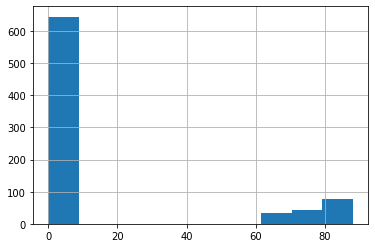

In [106]:
print(amplitudes.shape)
amplitudes.amplitude.hist()

In [98]:
non_spiking_amplitudes =\
    amplitudes[np.logical_not(amplitudes.spike.values)]
nsa_summary =\
    non_spiking_amplitudes\
        .groupby("connection")\
        .agg(["size", "mean", "std"])
print(nsa_summary.head())
#non_spiking_amplitudes.head()
nsa_summary[
    nsa_summary.spike["size"] < 20]

                 max_voltage                      spike             amplitude  \
                        size       mean       std  size   mean  std      size   
connection                                                                      
a787881-a1001485          20 -67.439327  0.412884    20  False  0.0        20   
a791916-a626057           20 -67.578167  0.822448    20  False  0.0        20   
a792337-a1001479          20 -69.182247  0.261542    20  False  0.0        20   
a793959-a1000127          20 -69.338196  0.266944    20  False  0.0        20   
a802484-a634359           20 -68.670489  0.165023    20  False  0.0        20   

                                      
                      mean       std  
connection                            
a787881-a1001485  2.560673  0.412884  
a791916-a626057   2.421833  0.822448  
a792337-a1001479  0.817753  0.261542  
a793959-a1000127  0.661804  0.266944  
a802484-a634359   1.329511  0.165023  


max_voltage                       spike              \
                        size       mean        std  size   mean  std   
connection                                                             
a814669-a626207            3 -65.111291   0.688464     3  False  0.0   
a836200-a627399           18 -66.294084   0.730542    18  False  0.0   
a843761-a1001256          18  -4.366559  15.742908    18  False  0.0   
a863874-a1004780          13 -63.716057   0.899169    13  False  0.0   
a884074-a630979            2 -69.924294   0.000000     2  False  0.0   
a908792-a617739            2 -68.084684   0.023896     2  False  0.0   

                 amplitude                        
                      size       mean        std  
connection                                        
a814669-a626207          3   4.888709   0.688464  
a836200-a627399         18   3.705916   0.730542  
a843761-a1001256        18  65.633441  15.742908  
a863874-a1004780        13   6.283943   0.899169  
a884074-a630979          2   0.075706   0.000000  
a908792-a617739          2   1.915316   0.023896

In [99]:
amplitudes.loc["a843761-a1001256"]

max_voltage  spike  amplitude
trial                               
0        -1.049313  False  68.950687
1        -0.375285  False  69.624715
2        -1.060486  False  68.939514
3        -1.120652  False  68.879348
4        -0.624045  False  69.375955
5        -0.136859   True  69.863141
6        -0.381313  False  69.618687
7        -0.403425  False  69.596575
8        -0.199039   True  69.800961
9        -0.824907  False  69.175093
10       -0.377884  False  69.622116
11       -0.884010  False  69.115990
12       -0.475341  False  69.524659
13      -67.437992  False   2.562008
14       -0.705702  False  69.294298
15       -0.377884  False  69.622116
16       -0.678009  False  69.321991
17       -0.908494  False  69.091506
18       -0.241931  False  69.758069
19       -0.671396  False  69.328604

In [16]:
from dmt.data.observation import measurement
def get_m(model, pathway):
    m = analysis_pspamp\
            .sample_measurement(
                model, adapter, pathway)
    m.index.name="trial"
    return m

def get_df(p):
    try:
        return get_m(pspsim_model, p).reset_index().assign(pathway=p)
    except ValueError as error:
        print("pathway", p, error)
        return pd.DataFrame()
#print(get_m(pspsim_model, pathways[0]))
#print(pathways[0])
#get_df(pathways[0])    
#pd.concat([
    #get_df(p) for p in pathways
#])
print(type(get_m(pspsim_model, pathways[0])))
measurement\
    .collection\
    .series_type((
        ({"pathway": p}, get_m(pspsim_model, pathway=p).dropna())
        for p in pathways))

<class 'pandas.core.frame.DataFrame'>


value
pathway        index          
L6_TPC-L6_BC   0.0    0.288741
               1.0    0.846746
               2.0    0.006621
               3.0    0.252211
               4.0    0.442218
...                        ...
L23_NBC-L23_PC 5.0    0.122298
               6.0    0.793042
               7.0    0.888287
               8.0    0.495304
               9.0    0.936584

[200 rows x 1 columns]

In [3]:
print(
    os.listdir(paths_pathways("primary")))

def get_pspsim(
        type_pathway,
        pathway,
        psp_dir=os.path.join(
            "validation", "psp-validation")):
    path_psp_dir =\
        os.path.join(
            path_project(83),
            psp_dir)
    path_data_output =\
        os.path.join(
            path_psp_dir,
            "output")
    path_pathway_sim_data =\
        os.path.join(
            path_psp_dir,
            "pathways",
            type_pathway,
            "{}-{}.yaml".format(pathway[0], pathway[1]))
    with open(path_pathway_sim_data, 'r') as file_sim_data:
        try:
            data_simulation =\
                yaml.load(file_sim_data, Loader=yaml.FullLoader)
        except:
            data_simulation =\
                yaml.load(file_sim_data)
        print(data_simulation)
        return SimulationPSP(data_simulation, path_output=path_data_output)

['L23_NBC-L23_PC.yaml', 'L5_PC-L5_BC.yaml', 'L6_IPC-L6_BPC.yaml', 'L23_LBC-L23_PC.yaml', 'L6_TPC-L6_BC.yaml', 'L6_TPC-L6_TPC.yaml', 'L6_TPC-L6_BPC.yaml', 'L5_TTPC-L5_TTPC.yaml', 'L4_SS-L23_PC.yaml', 'L6_IPC-L6_IPC.yaml', 'L23_NBC_LBC-L23_PC.yaml', 'temp', 'L4_EXC-L4_EXC.yaml', 'L23_PC-L23_PC.yaml', 'L5_TTPC-L5_MC.yaml', 'L6_IPC-L6_BC.yaml', 'L5_STPC-L5_STPC.yaml', 'L5_MC-L5_TTPC.yaml', 'L6_IPC-L6_MC.yaml', 'L23_BC-L23_PC.yaml', 'L6_TPC-L6_MC.yaml']


In [23]:
sim_l6tpc_l6tpc =\
    get_pspsim("primary", ("L6_TPC", "L6_TPC"))
traces =\
    sim_l6tpc_l6tpc.traces\
                   .set_index([
                       "connection",
                       "trial",
                       "record_step"])

  2%|▎         | 1/40 [00:00<00:04,  8.14it/s]

{'reference': {'author': None, 'psp_amplitude': {'mean': 1.51, 'std': 0.98}, 'synapse_count': {'mean': None, 'std': None}}, 'pathway': {'pre': 'L6_TPC', 'post': 'L6_TPC', 'constraints': {'unique_gids': True, 'max_dist_x': 100.0, 'max_dist_z': 100.0}}, 'protocol': {'record_dt': 0.1, 'hold_V': -70.0, 't_stim': 800.0, 't_stop': 900.0, 'post_ttx': False}}
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize SimulationPSP with field-values
path_output: /gpfs/bbp.cscs.ch/project/proj83/validation/psp-validation/output
reference: {'author': None, 'psp_amplitude': {'mean': 1.51, 'std': 0.98}, 'synapse_count': {'mean': None, 'std': None}}
pathway: {'pre': 'L6_TPC', 'post': 'L6_TPC', 'constraints': {'unique_gids': True, 'max_dist_x': 100.0, 'max_dist_z': 100.0}}
protocol: {'record_dt': 0.1, 'hold_V': -70.0, 't_stim': 800.0, 't_stop': 900.0, 'post_ttx': False}


100%|██████████| 40/40 [00:01<00:00, 23.72it/s]


In [24]:
connections =[
    '-'.join(pair) 
    for pair in sim_l6tpc_l6tpc.connections]

In [38]:
from dmt.tk.plotting.multi import MultiPlot
from dmt.tk.plotting.lines import LinePlot

plotter =\
    MultiPlot(
        mvar="connection",
        plotter=LinePlot(
            xvar="time",
            xlabel="Time[ms]",
            yvar="voltage",
            ylabel="Voltage[mV]",
            gvar="trial"))

def plot_connection(connections):
    plotting_data =\
        traces.loc[connections]\
              .query("time > @sim_l6tpc_l6tpc.protocol.t_stim - 100")
    return\
        plotter\
            .get_figures(plotting_data)

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize LinePlot with field-values
xvar: time
xlabel: Time[ms]
yvar: voltage
ylabel: Voltage[mV]
gvar: trial

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize MultiPlot with field-values
mvar: connection
plotter: <dmt.tk.plotting.lines.LinePlot object at 0x12ff95550>



/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x1413758d0>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x16c149290>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x13f330b10>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x16d914310>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x16ffdb710>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x16ff2b1d0>
caption: Caption not provided



/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x1811bed50>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x1675700d0>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x17ec89a90>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x19c9d9550>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x19d770e10>
caption: Caption not provided

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x19e591890>
caption: Caption not provided



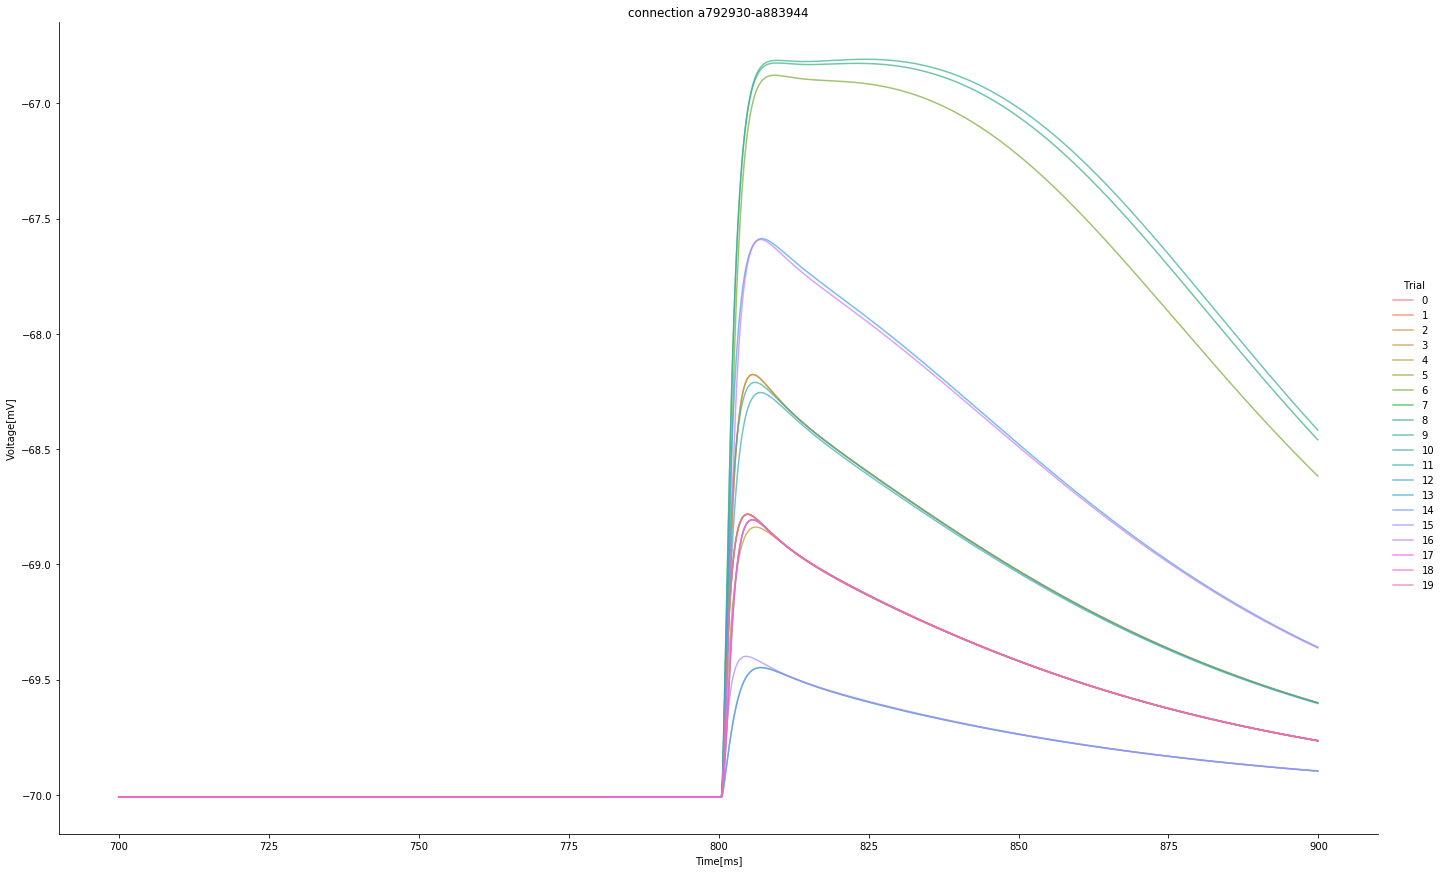

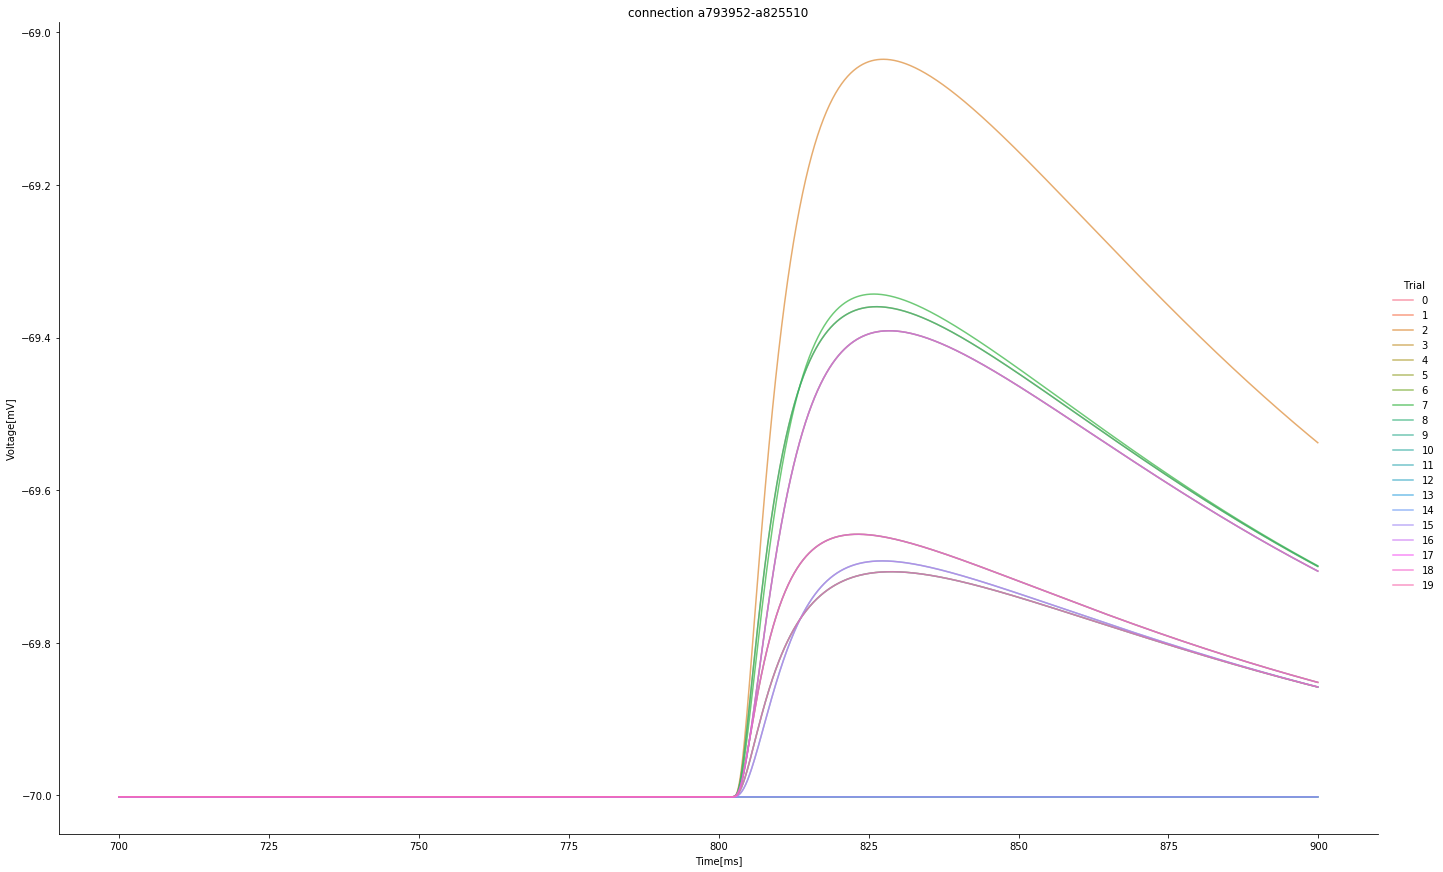

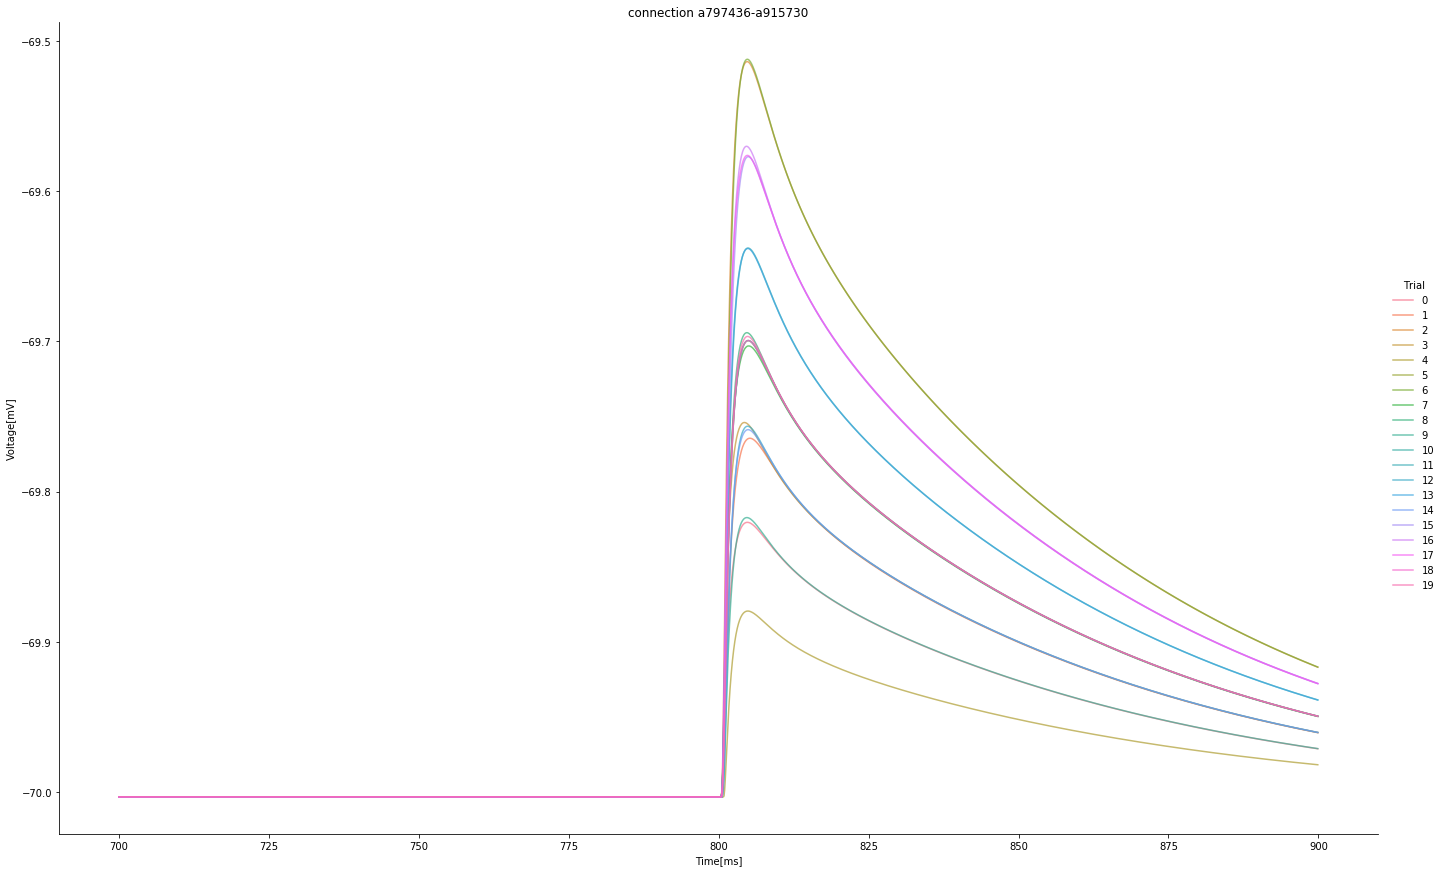

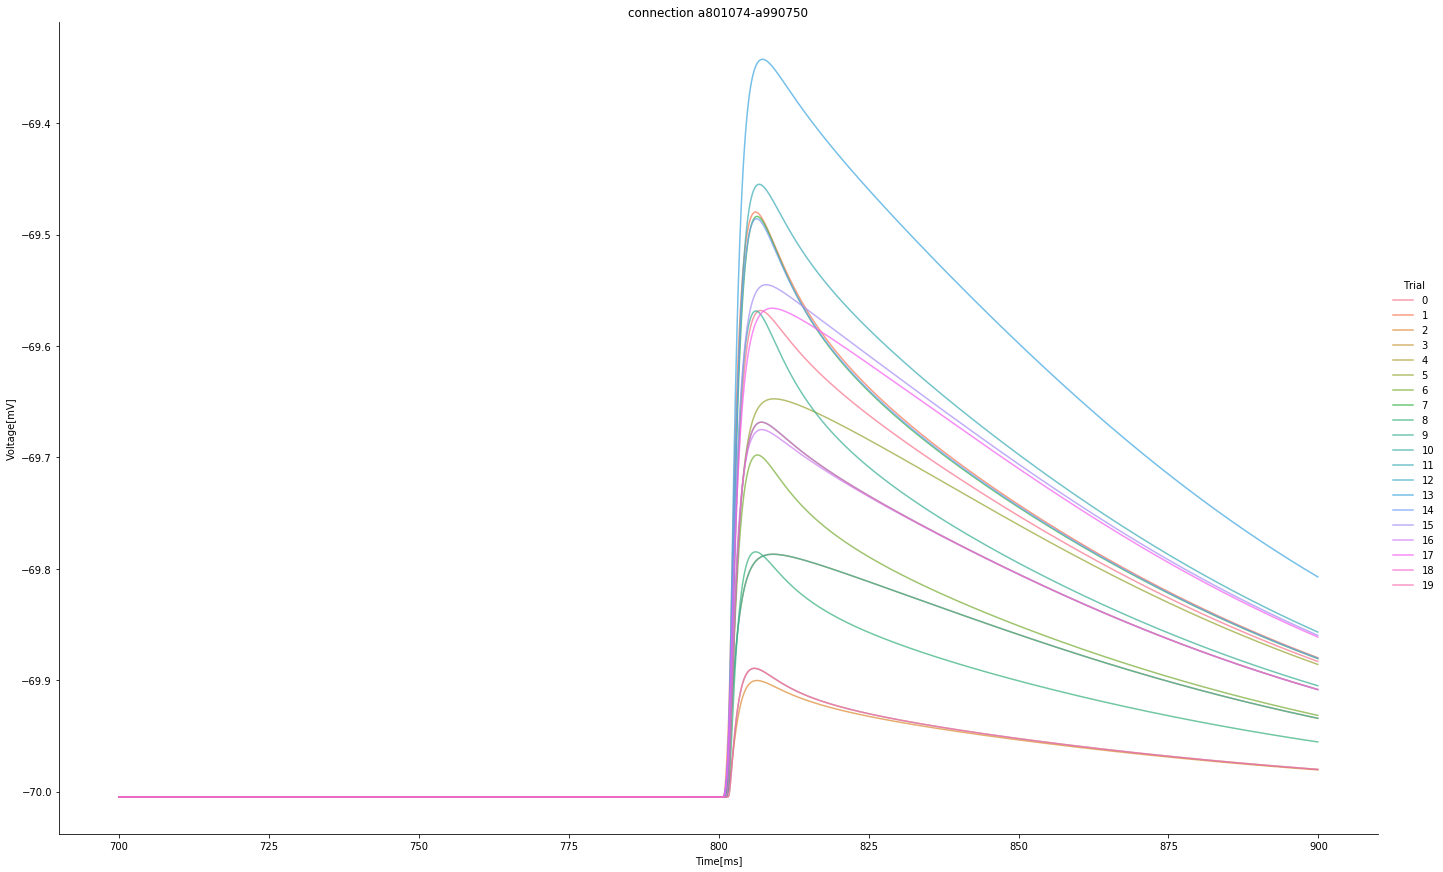

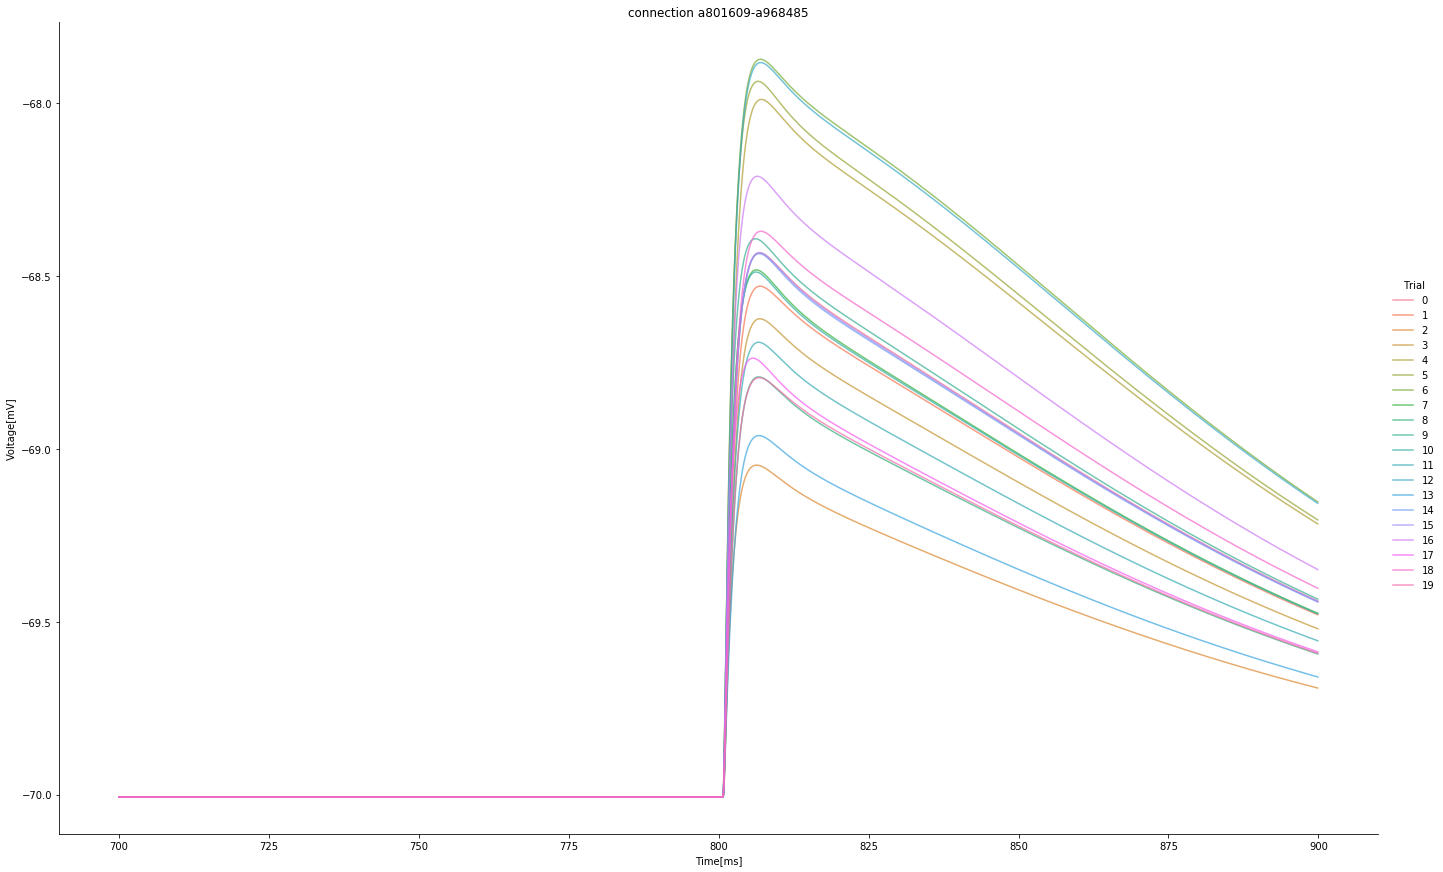

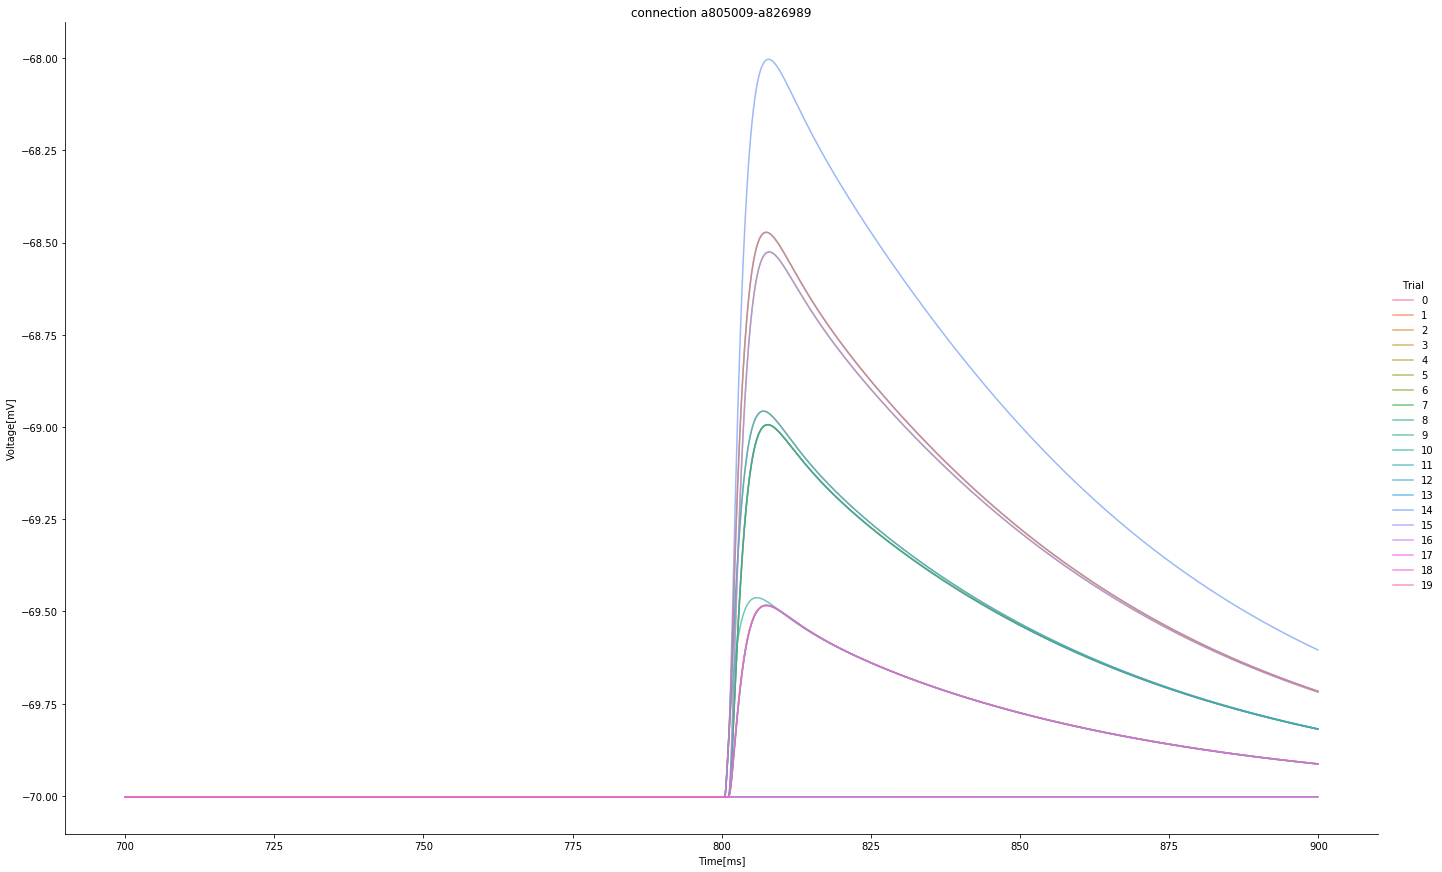

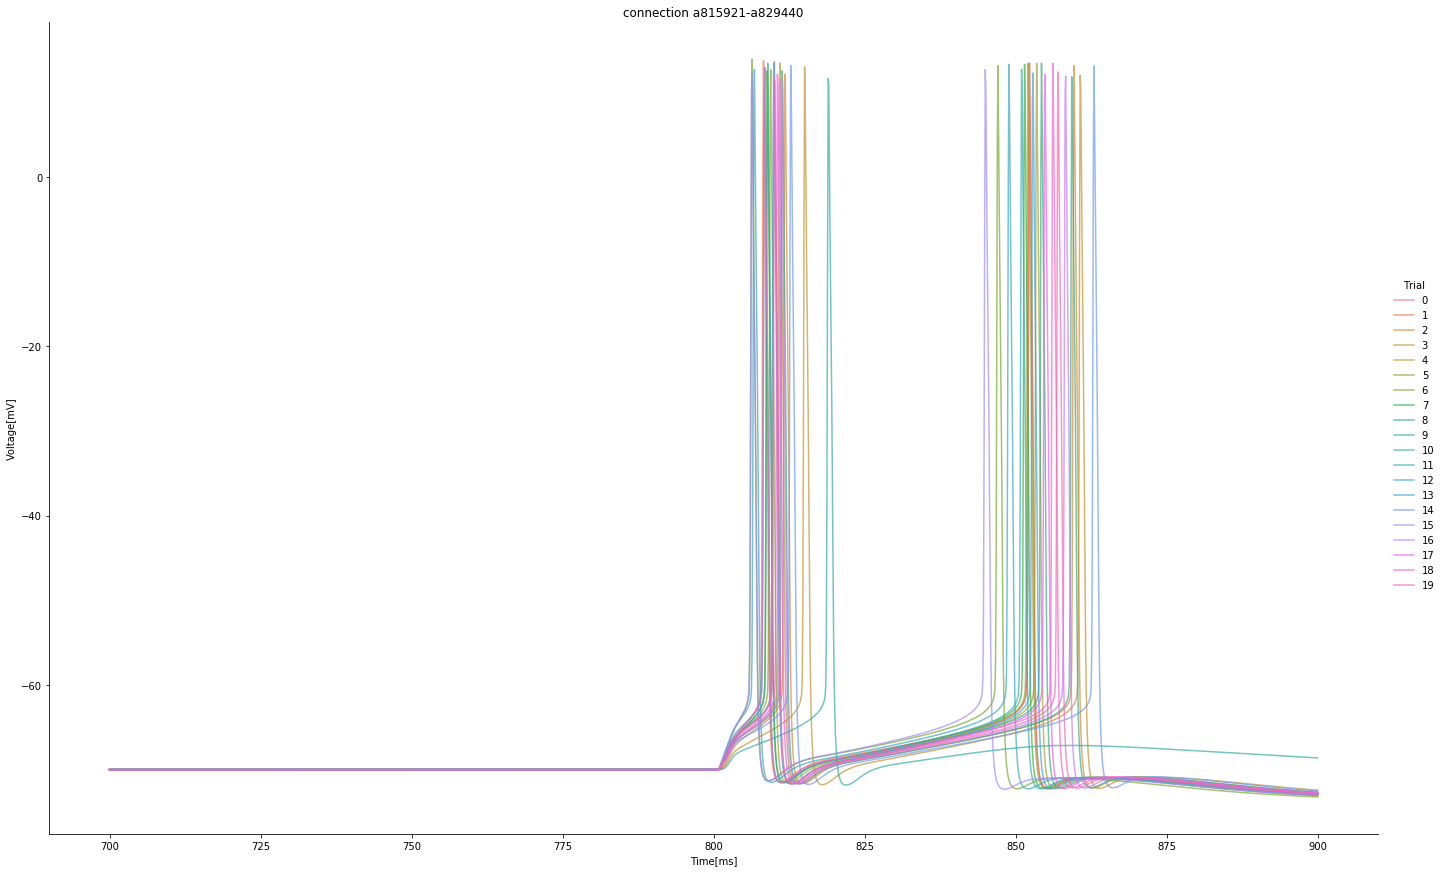

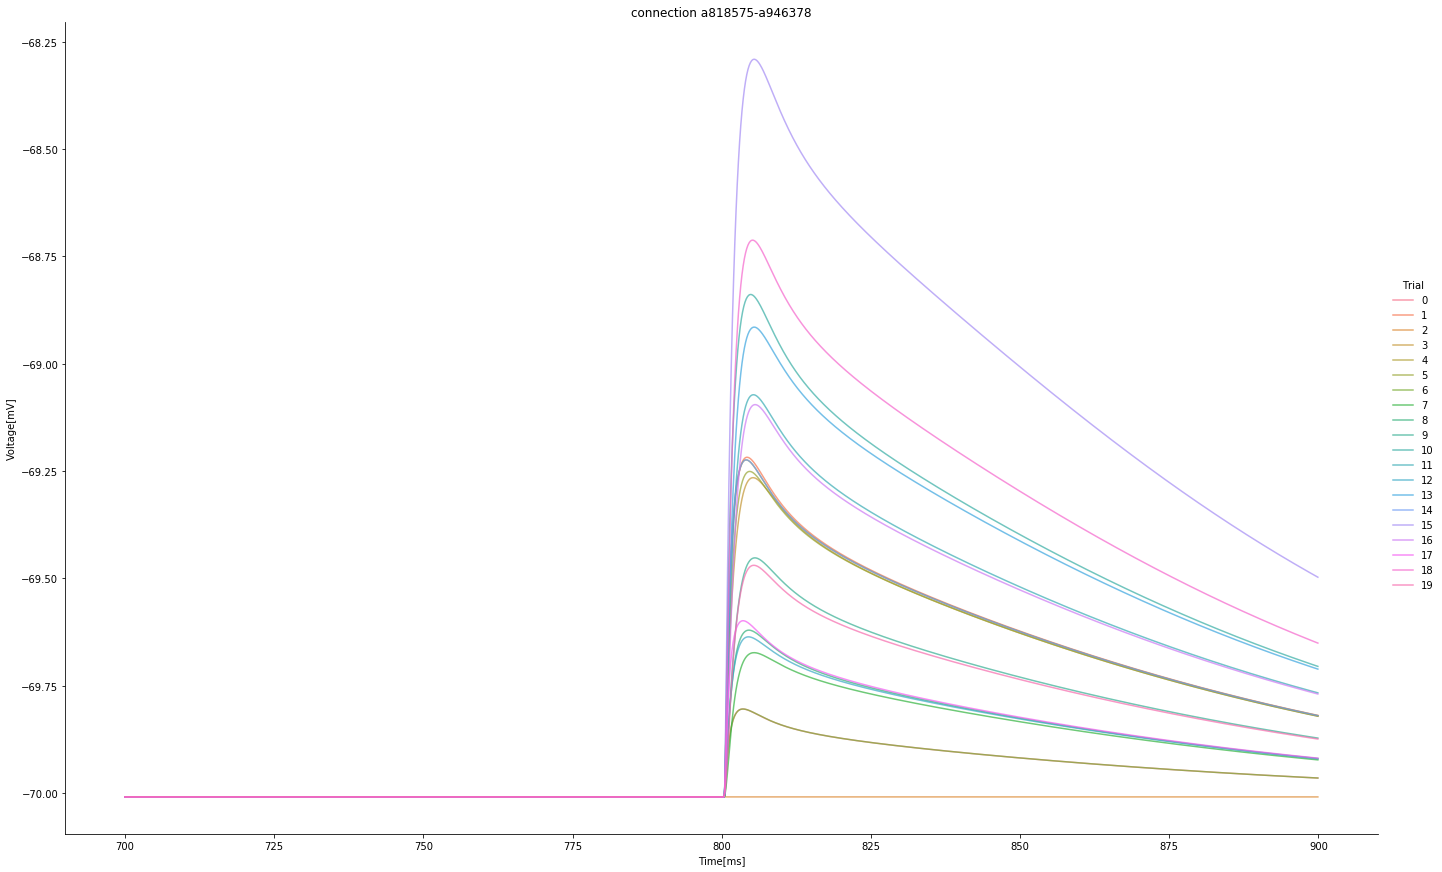

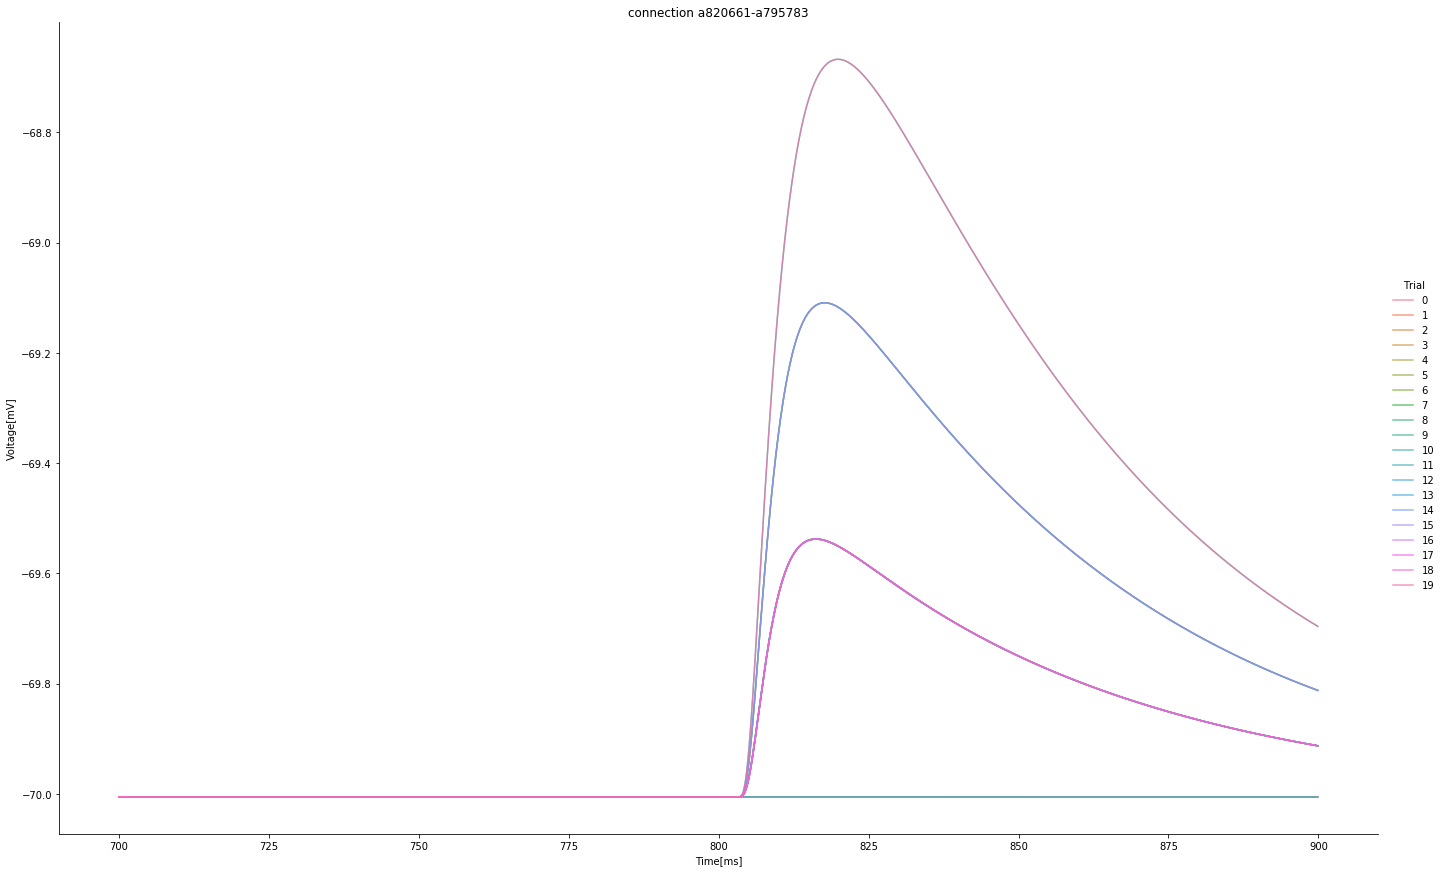

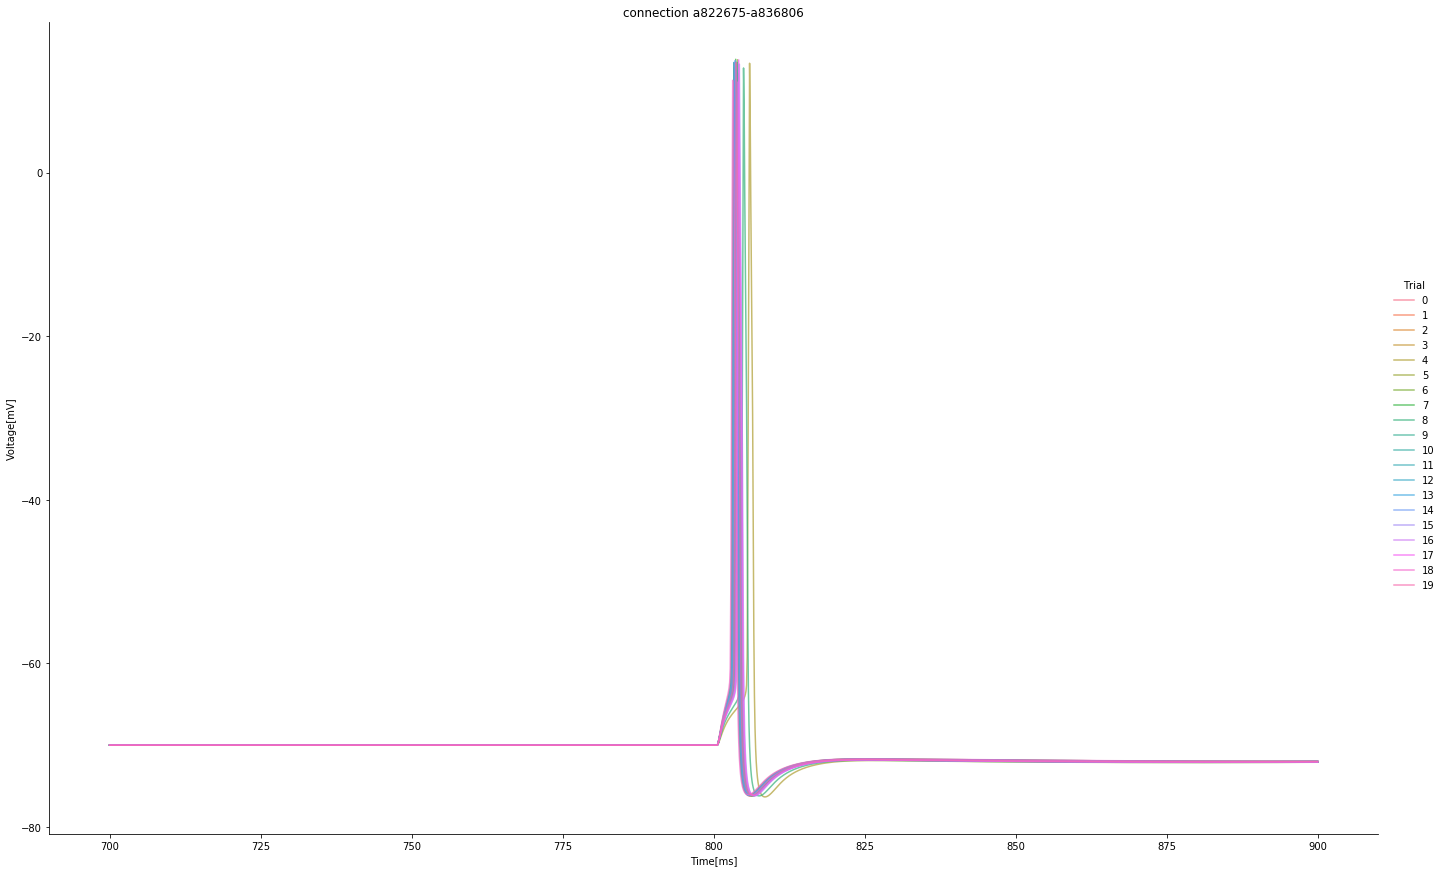

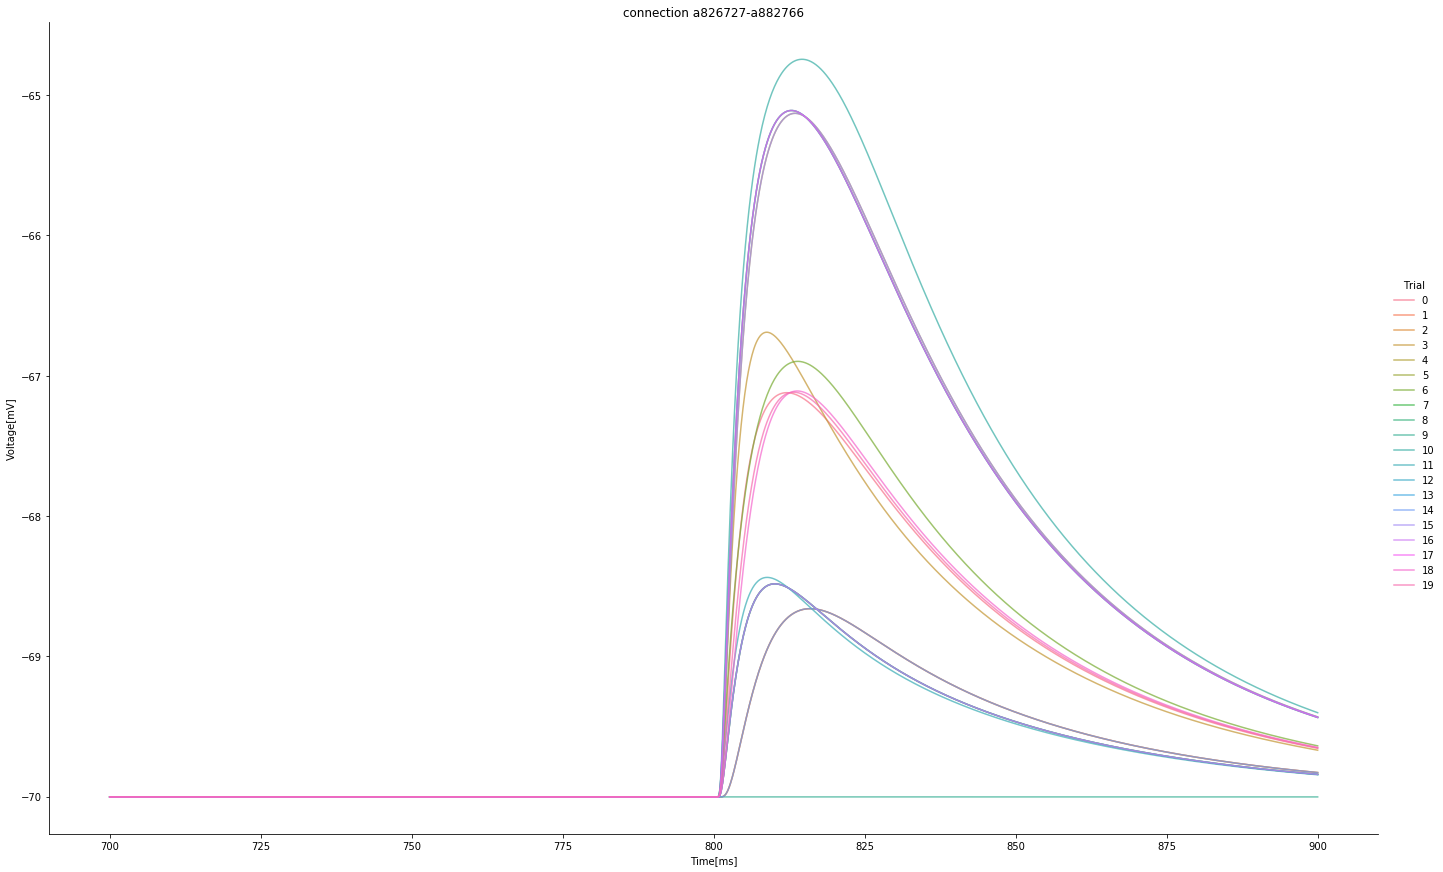

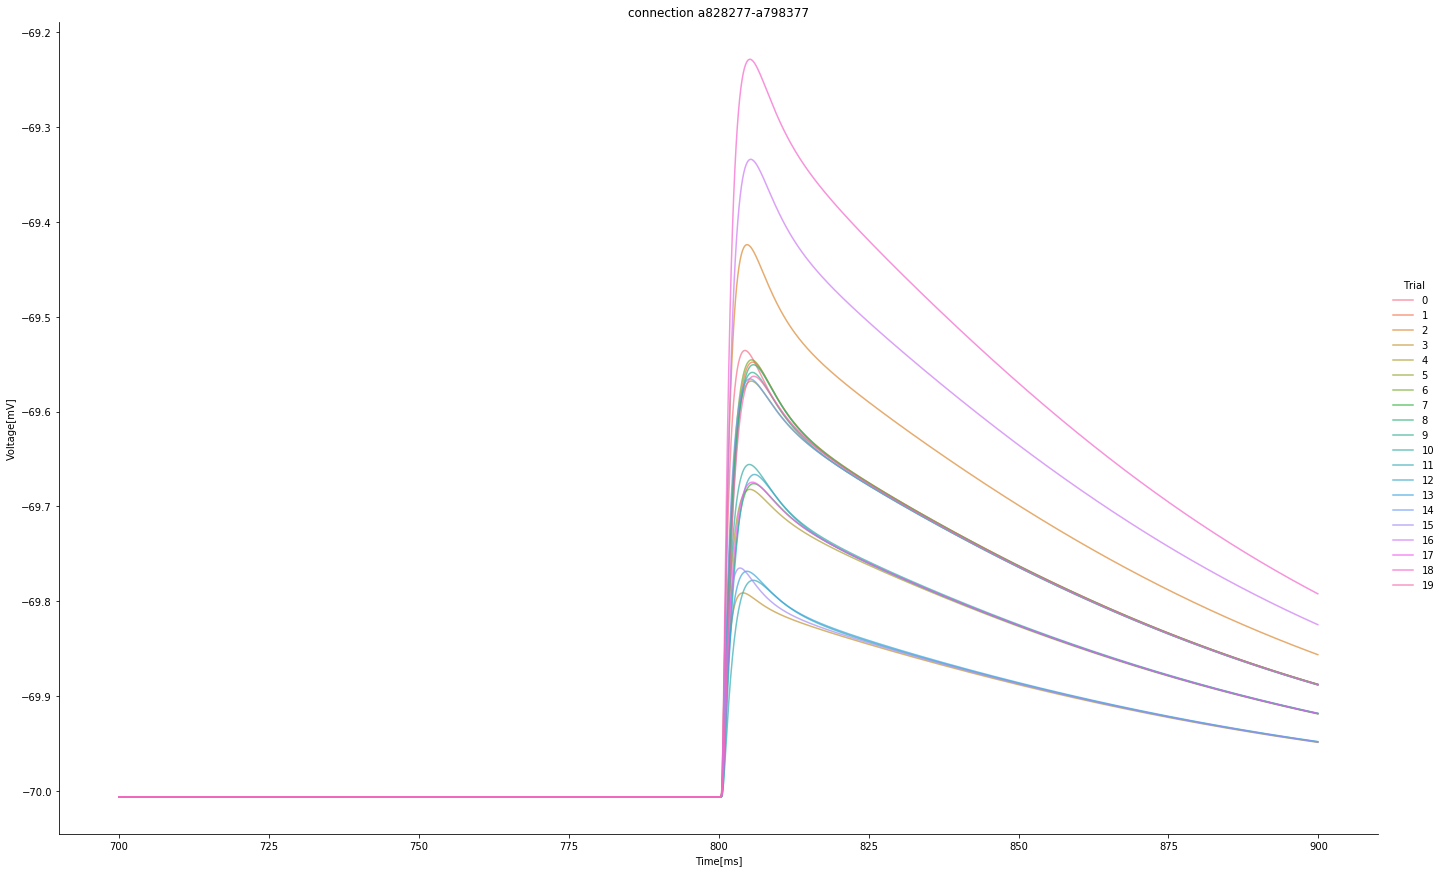

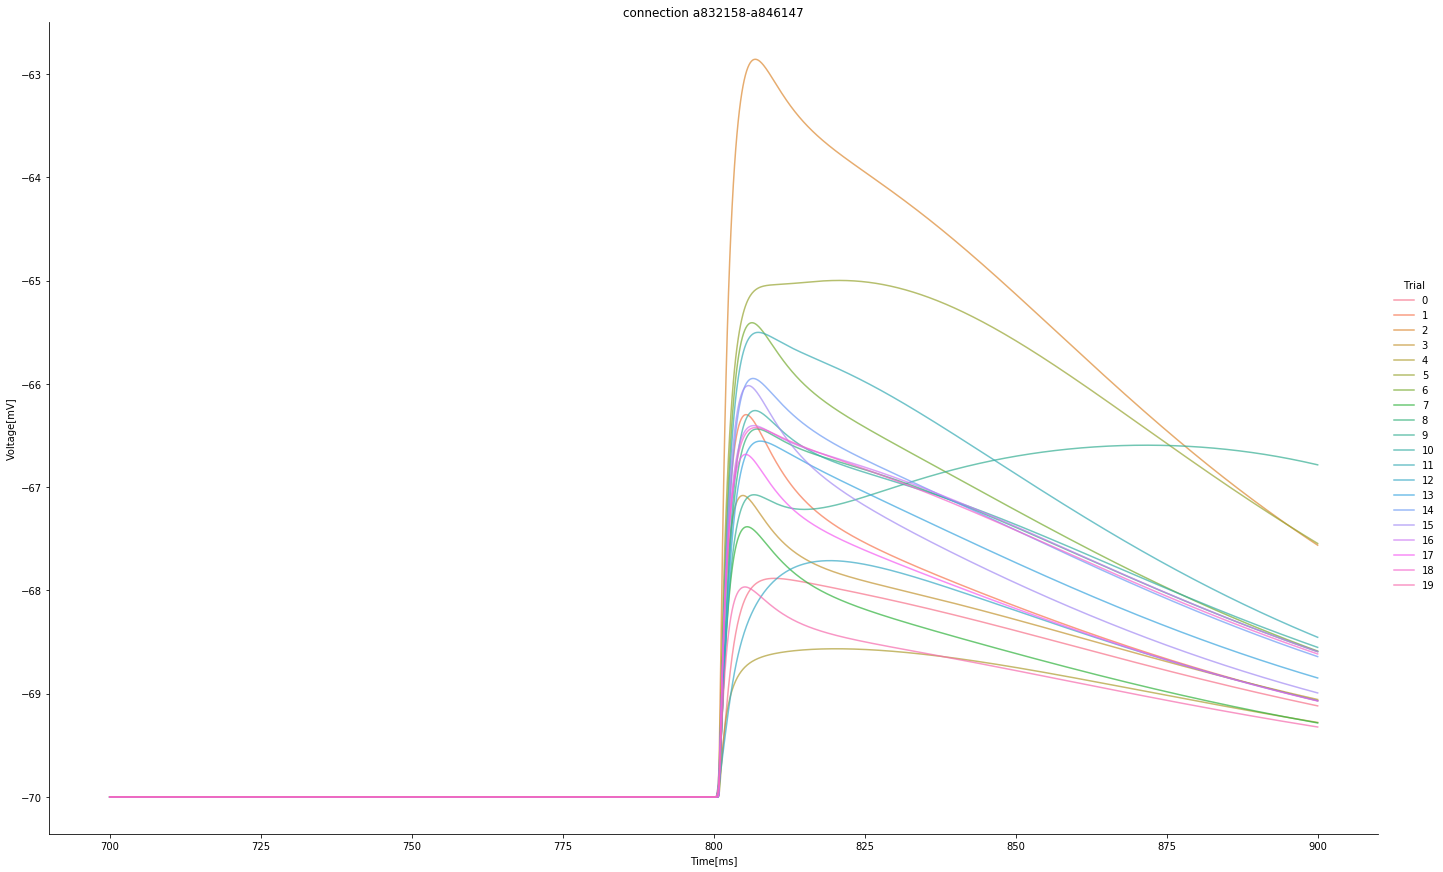

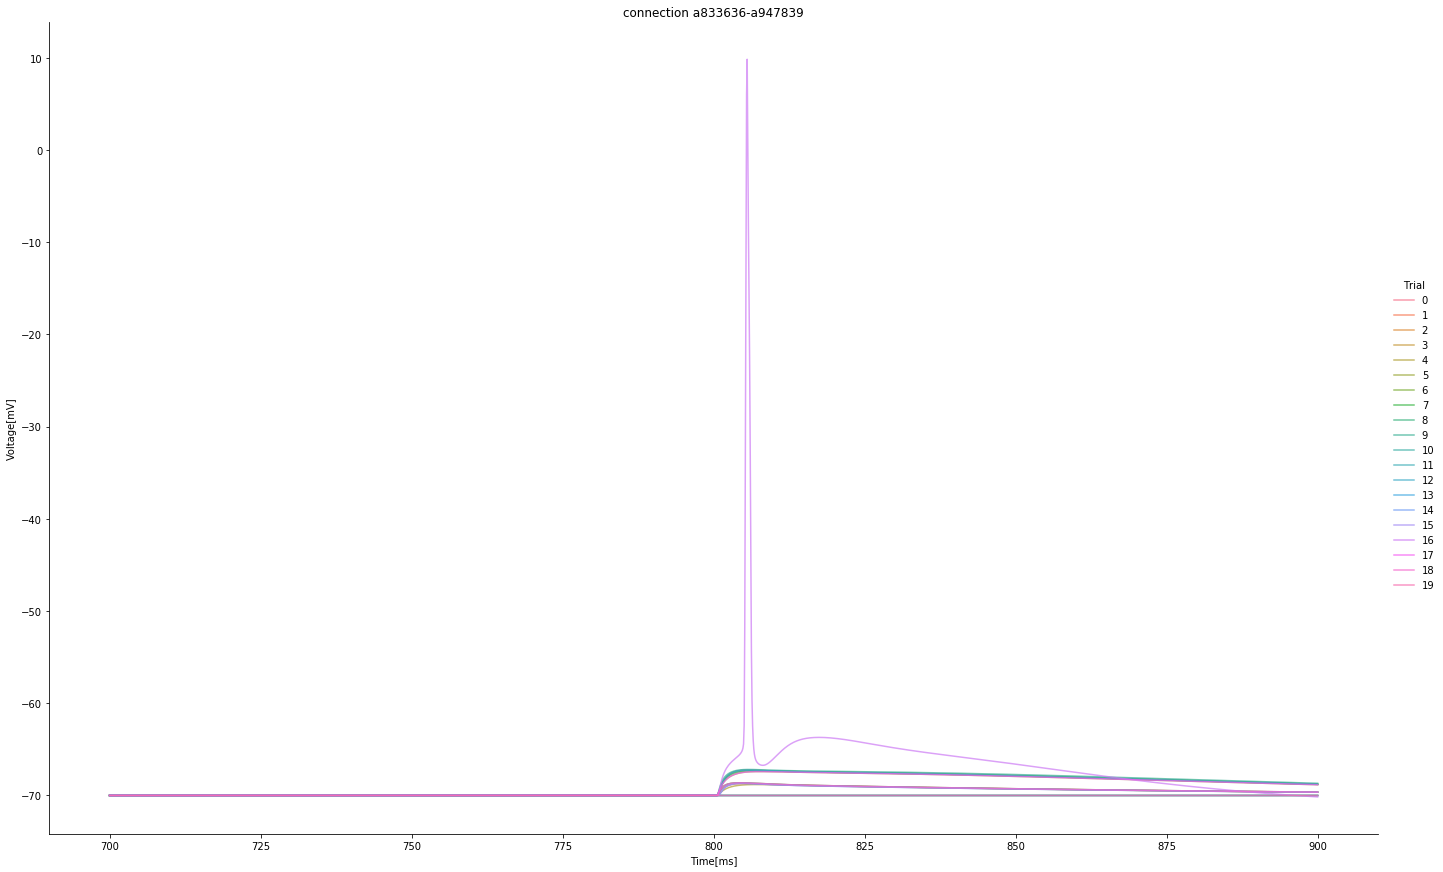

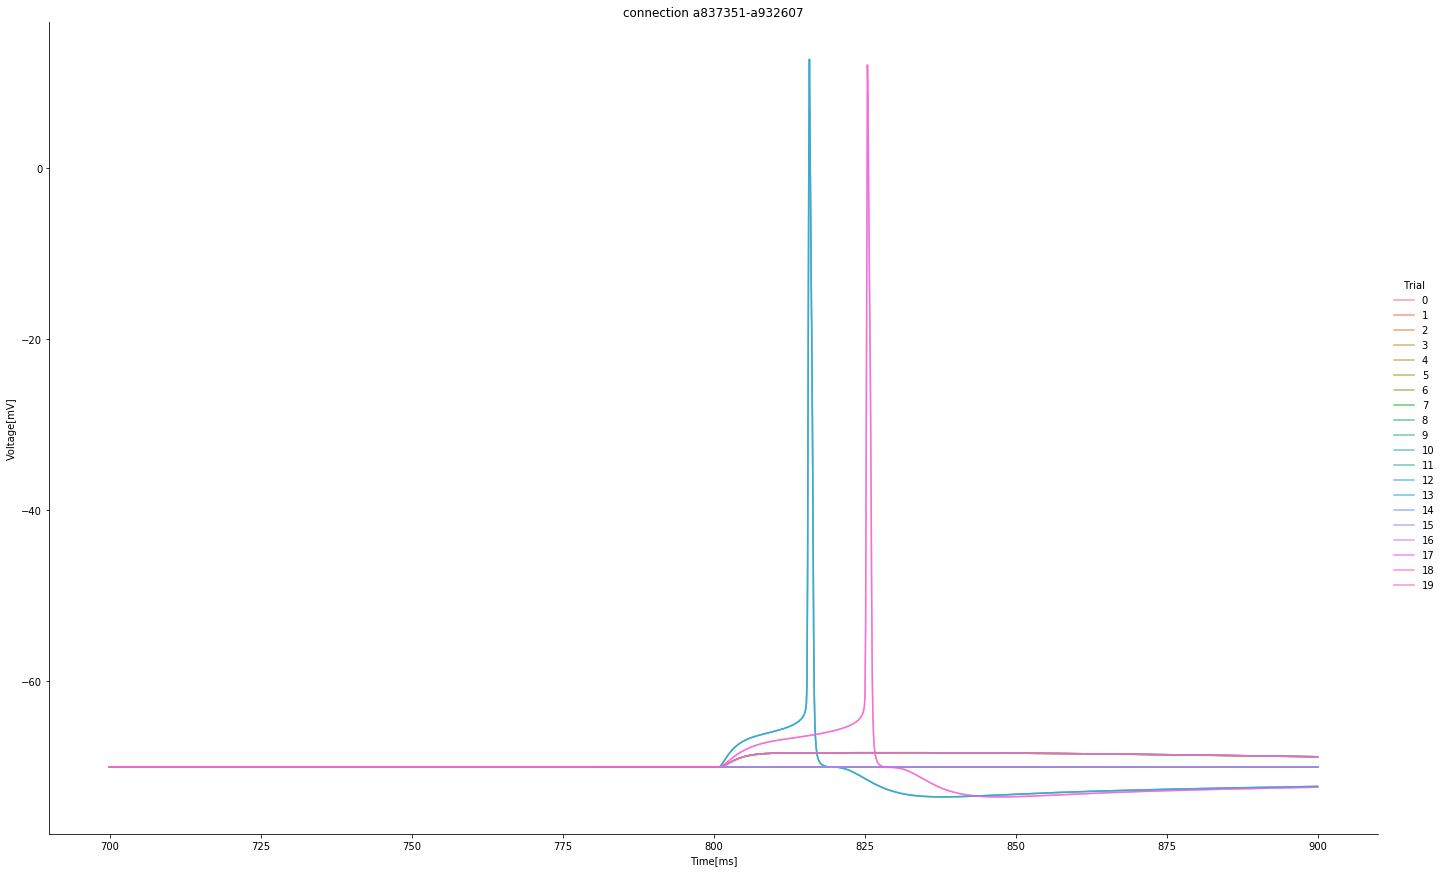

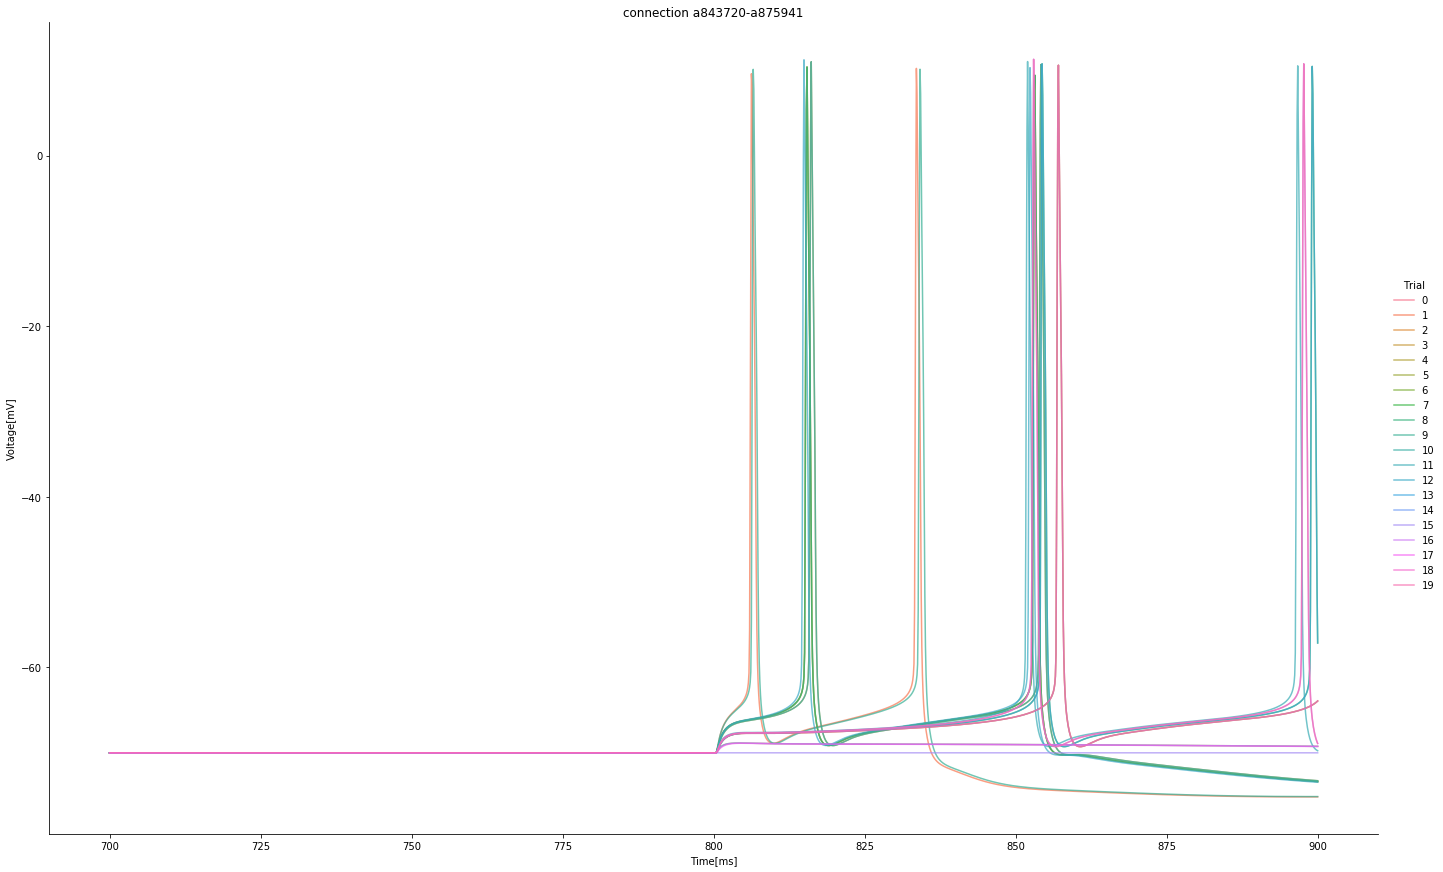

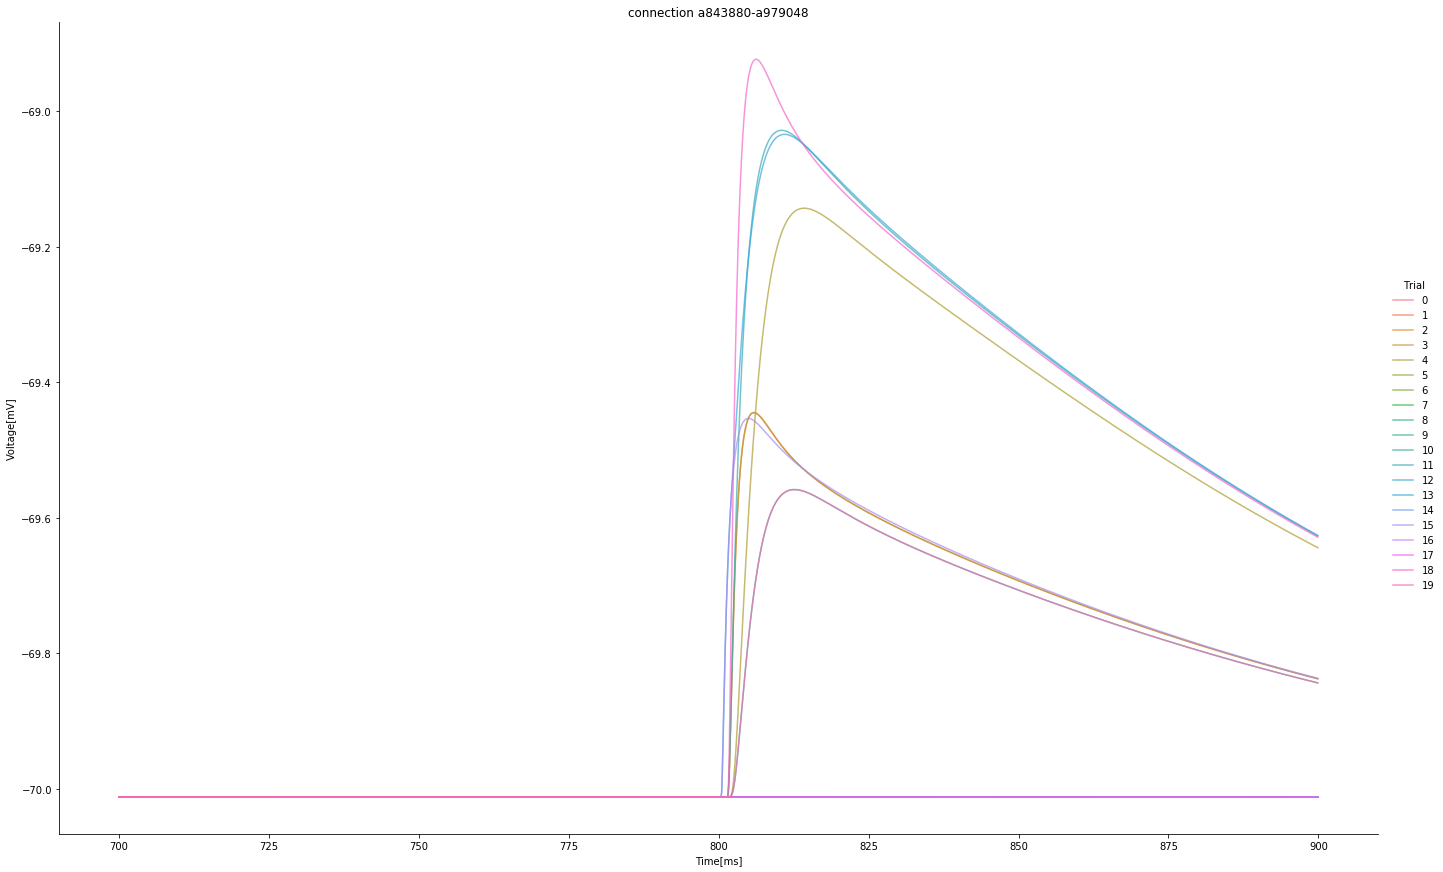

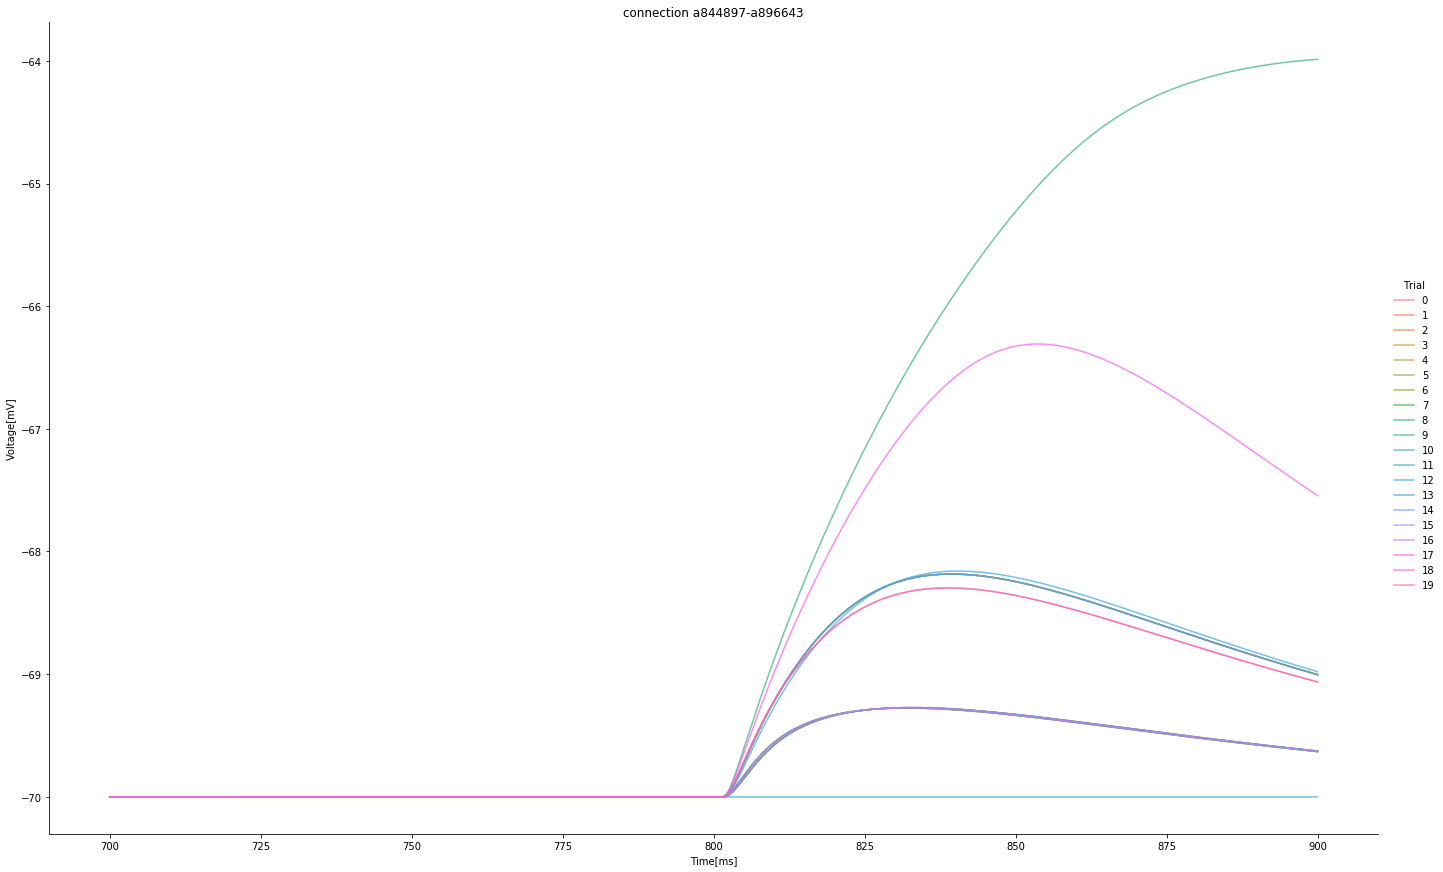

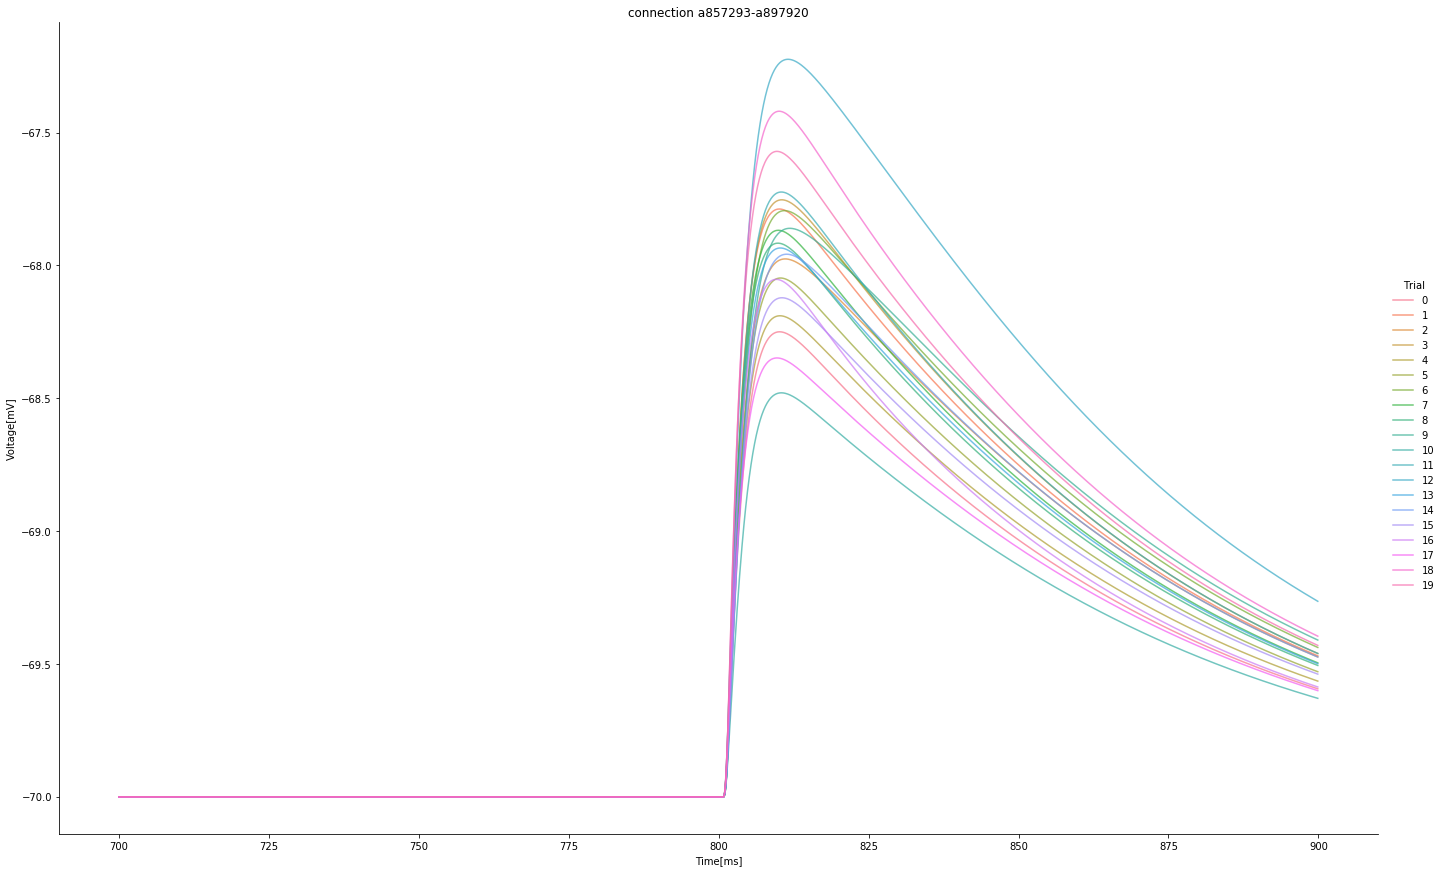

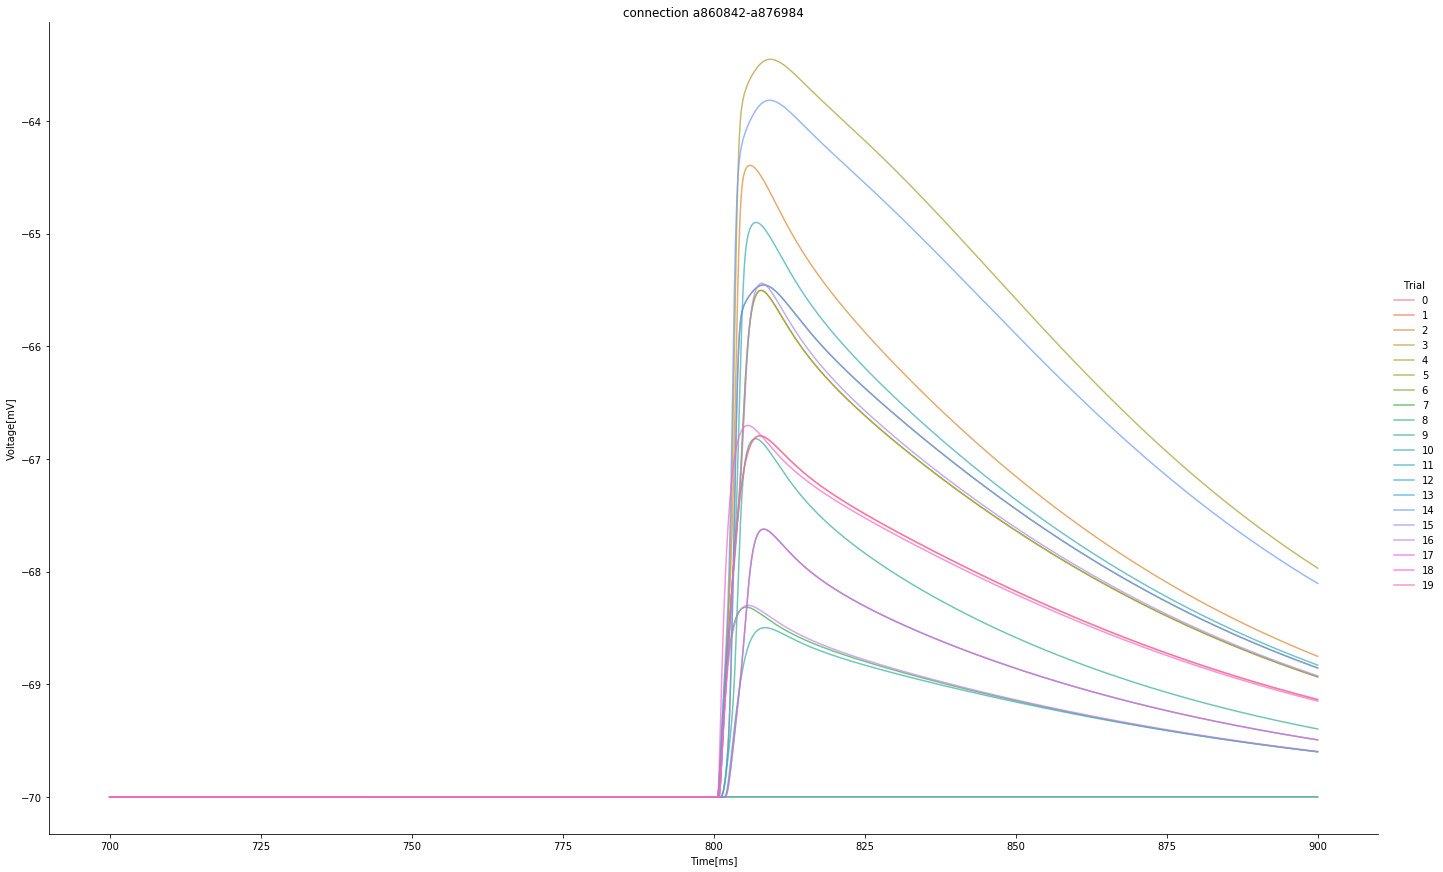

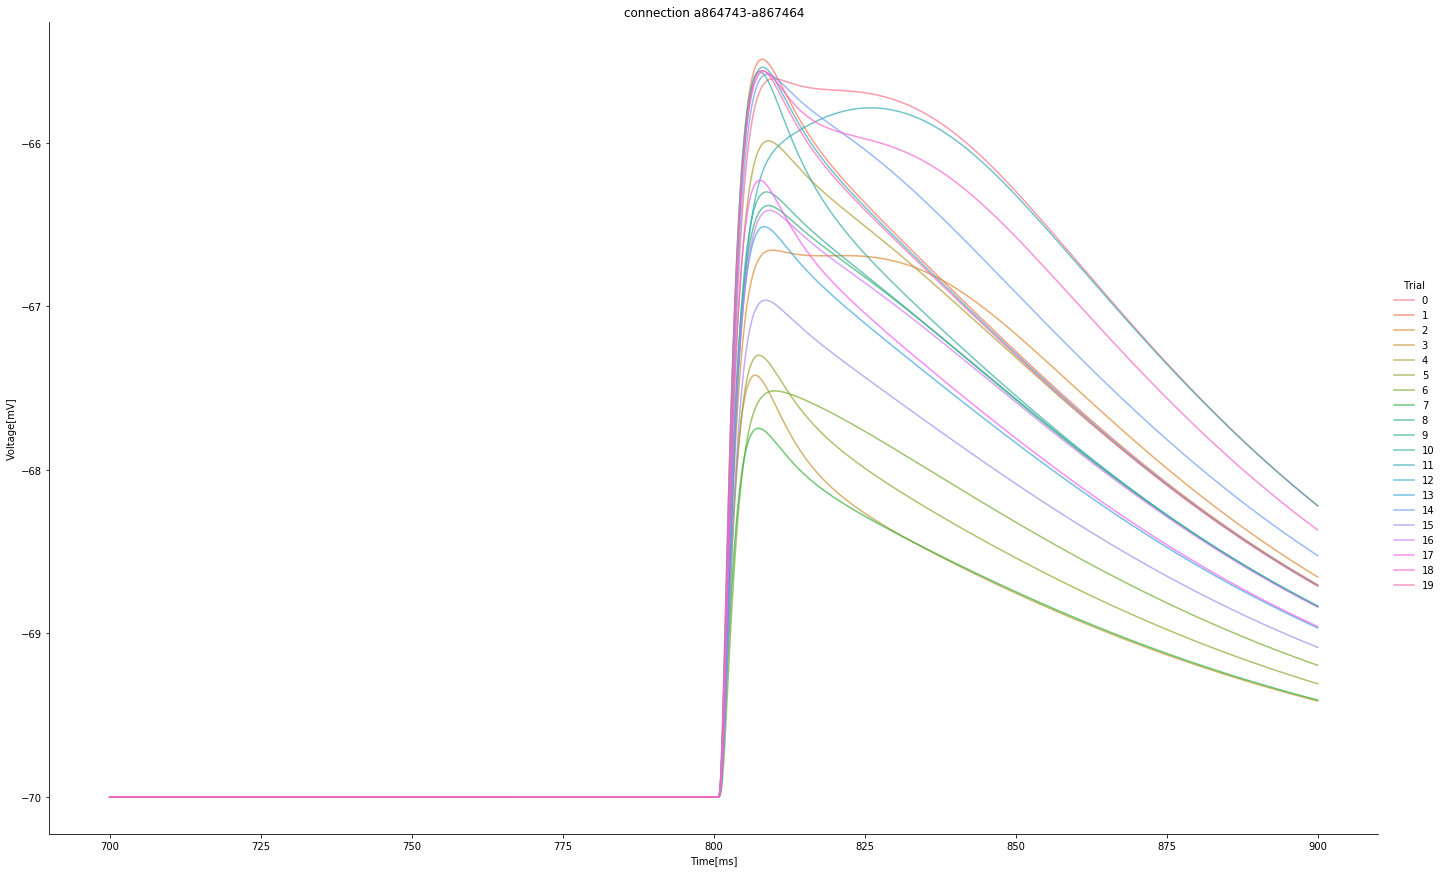

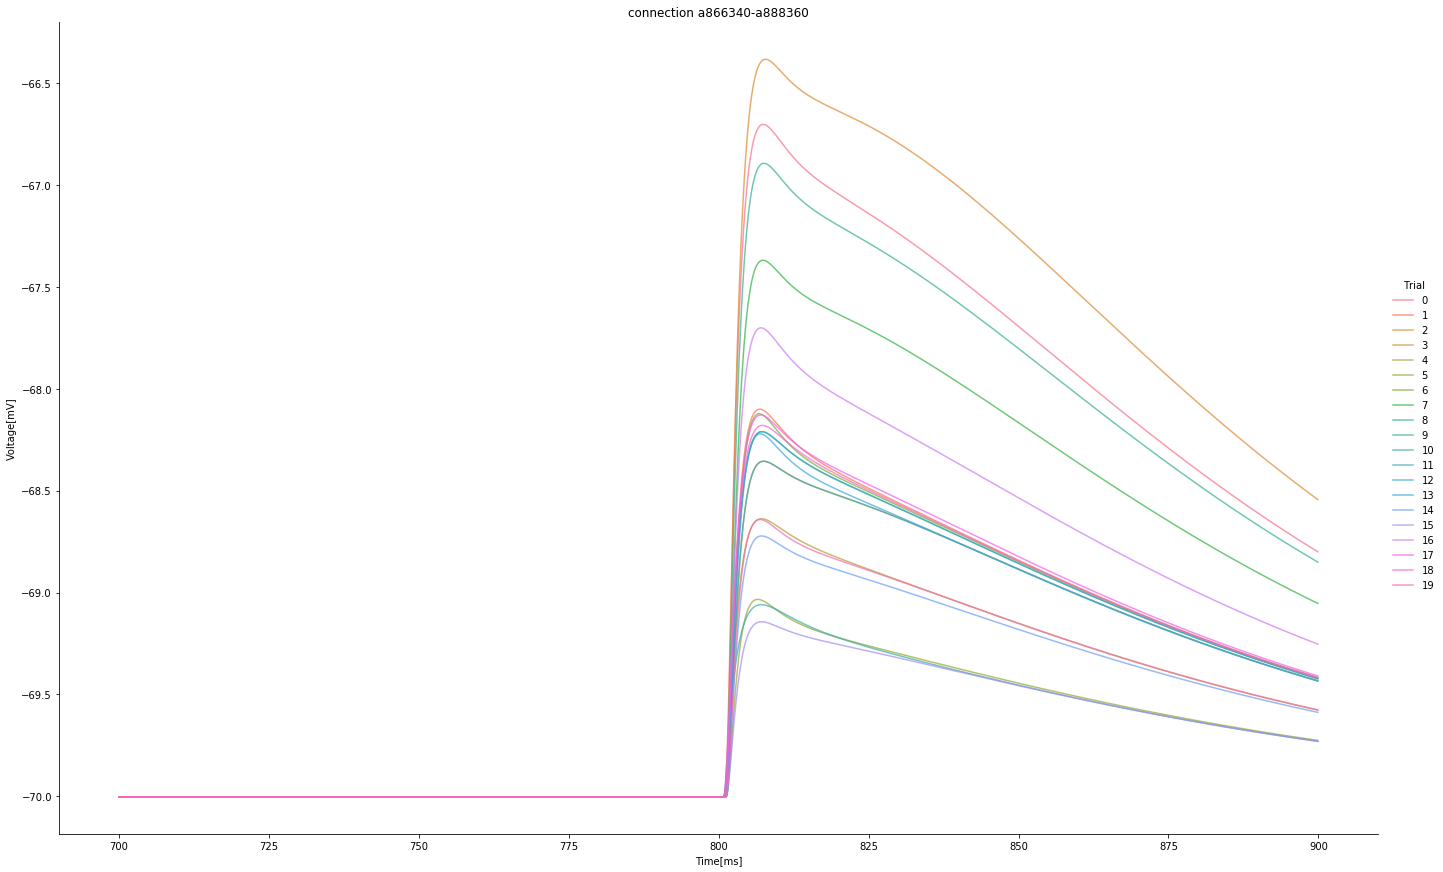

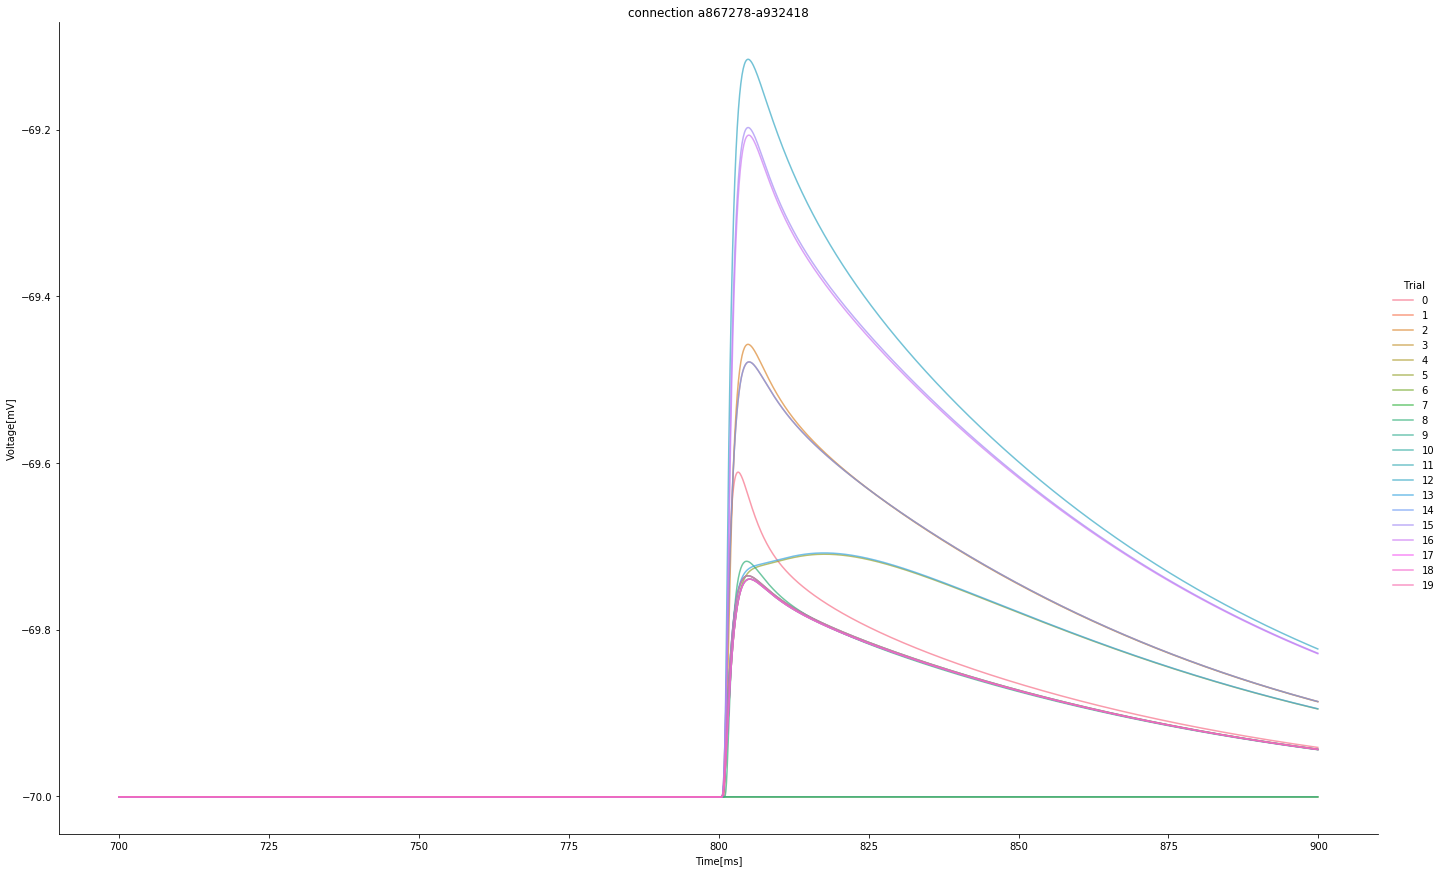

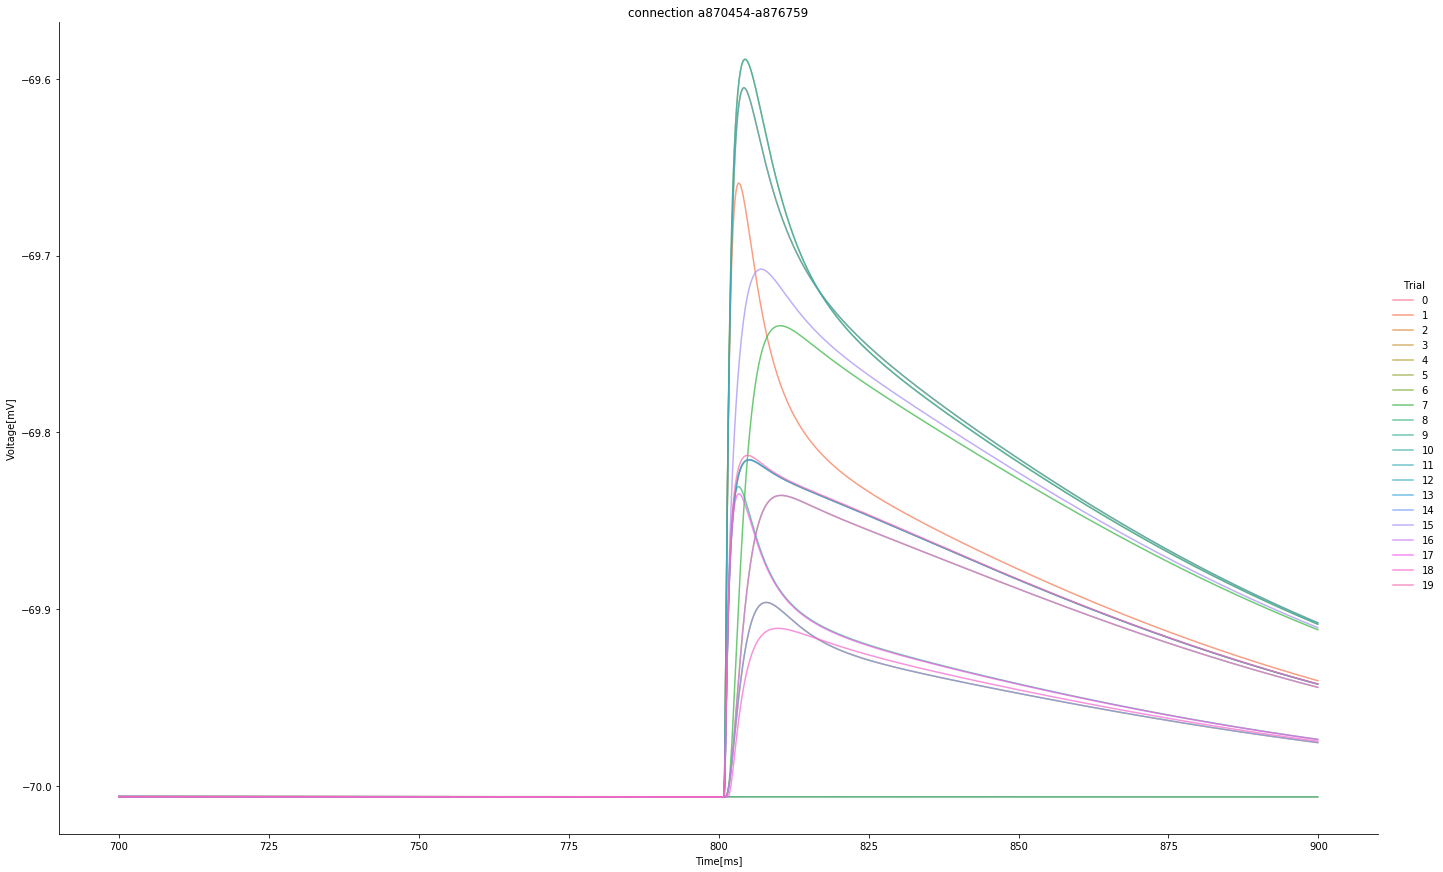

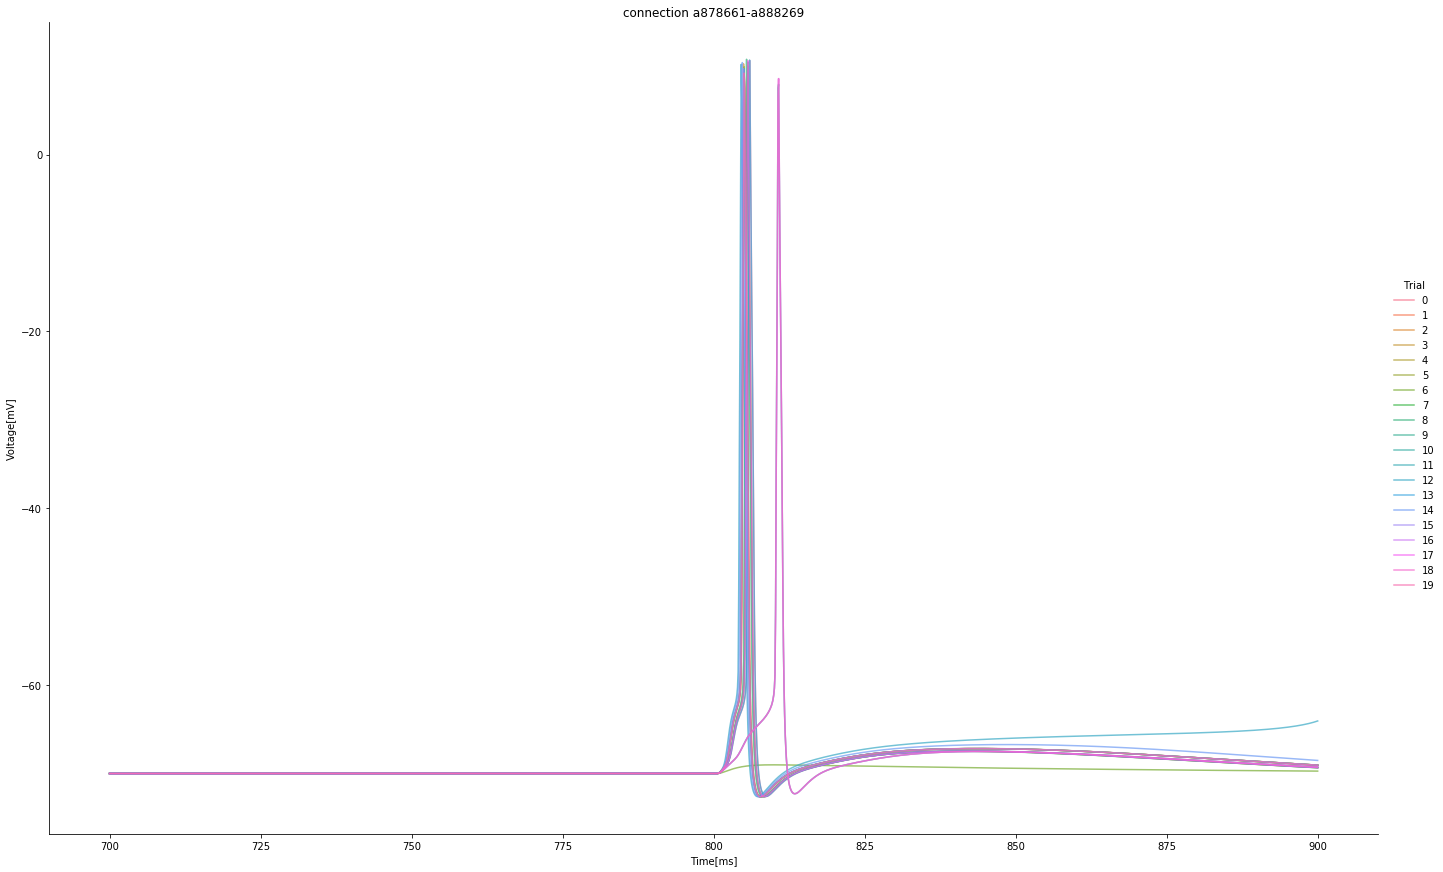

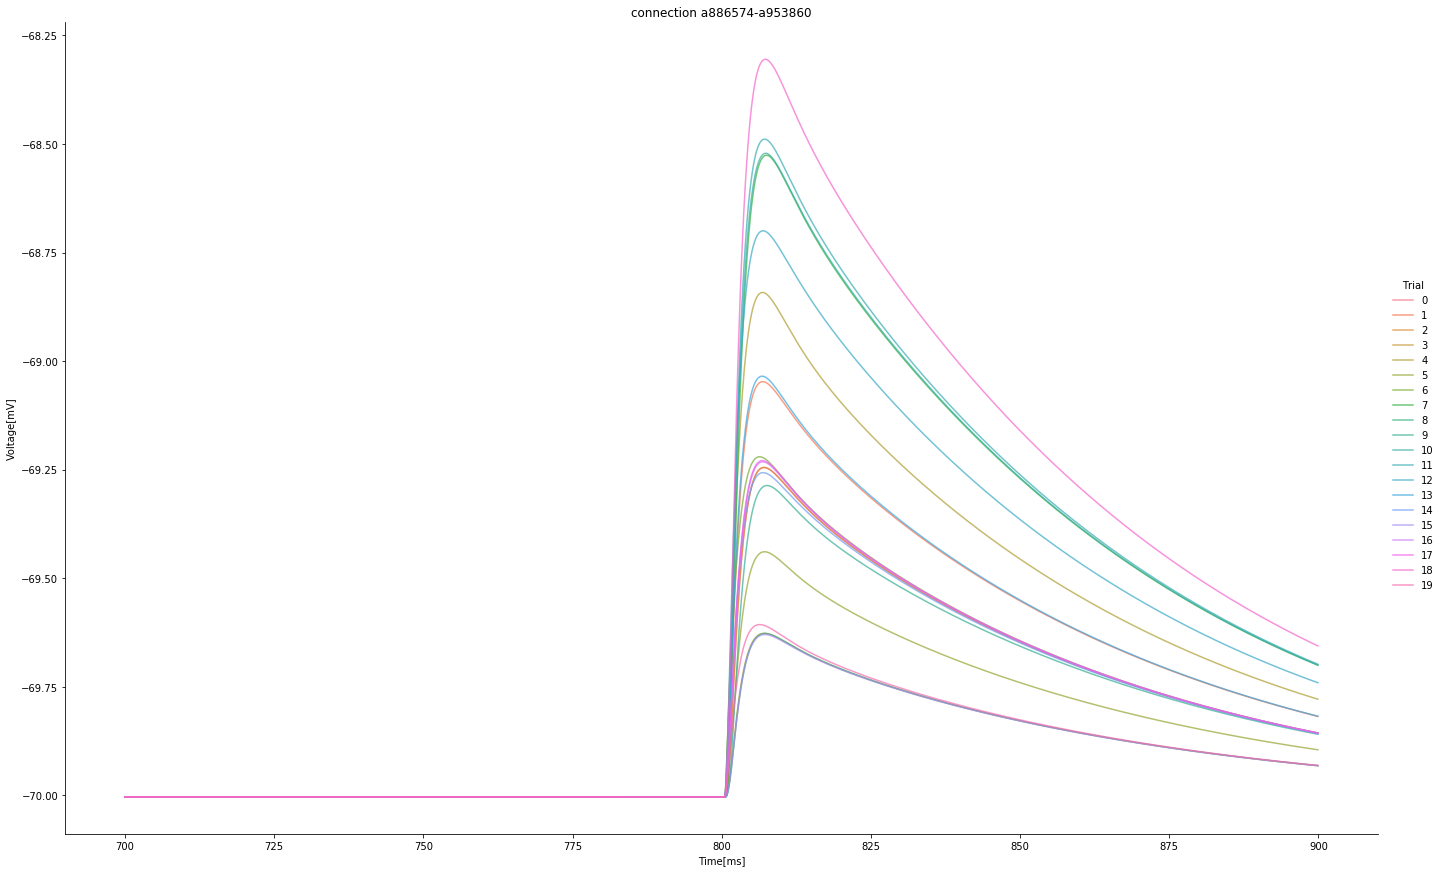

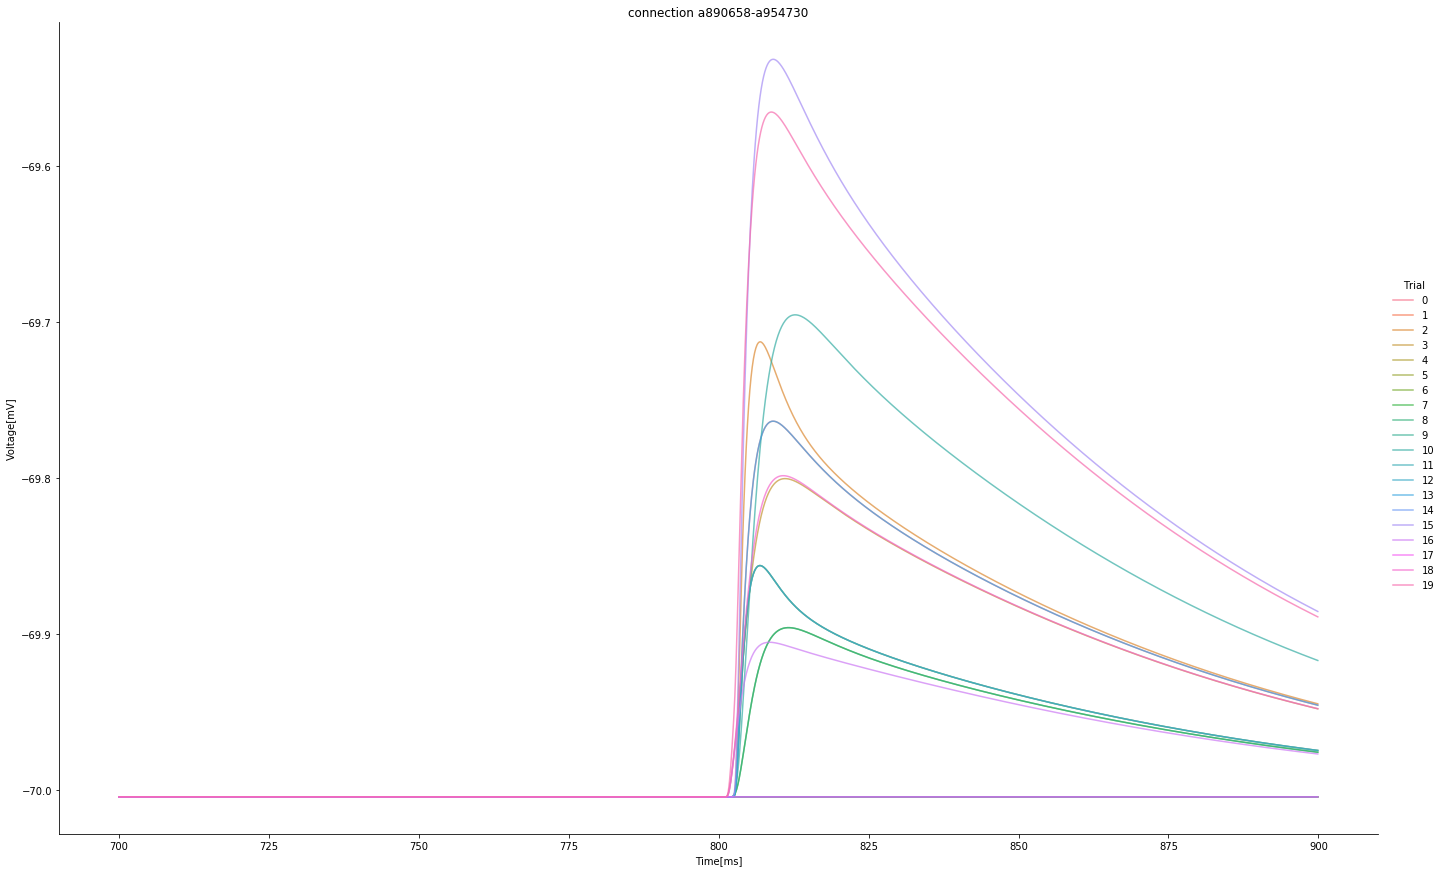

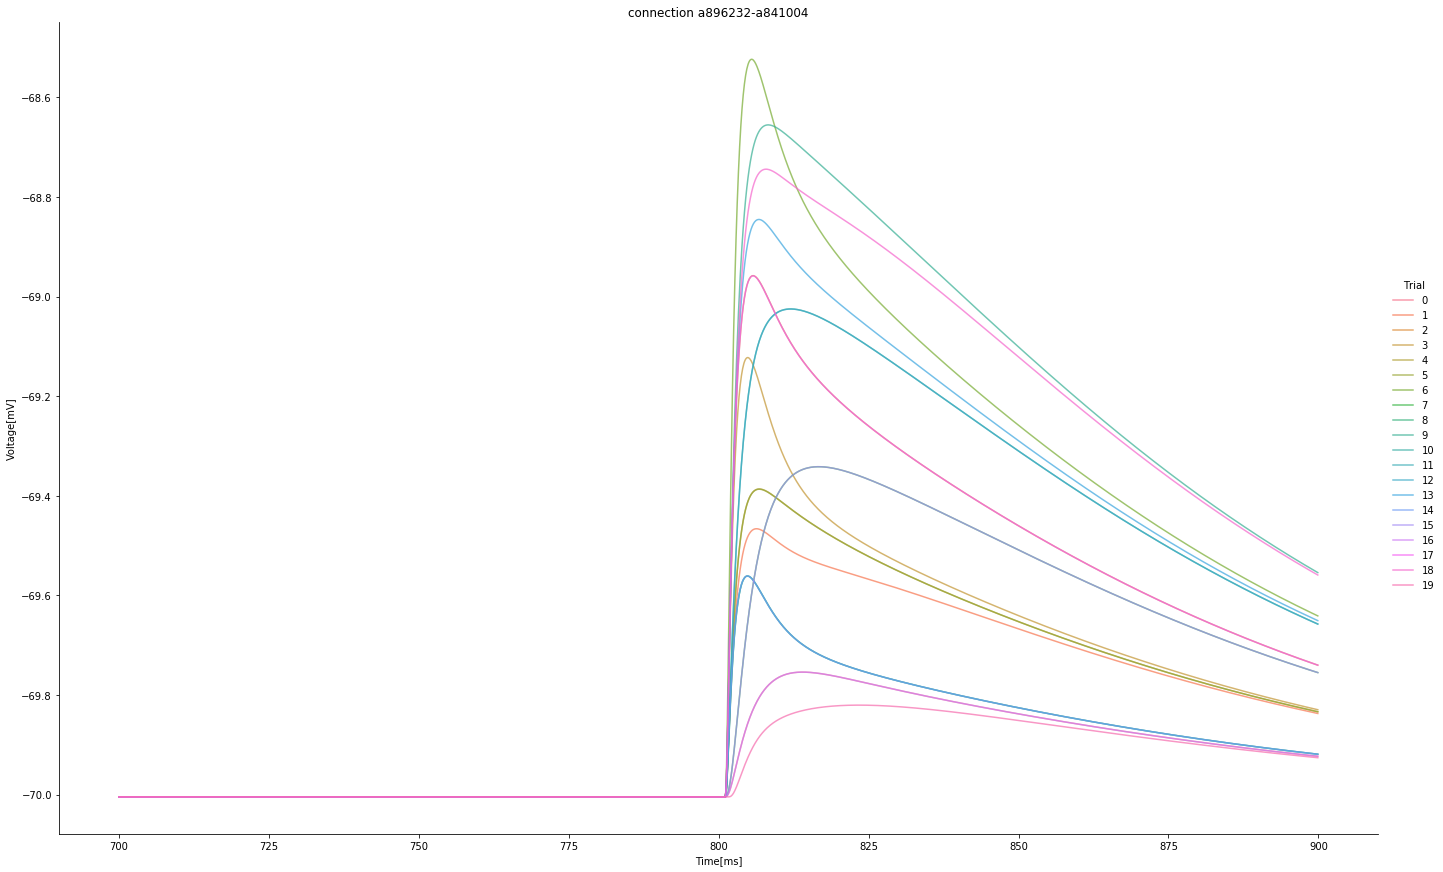

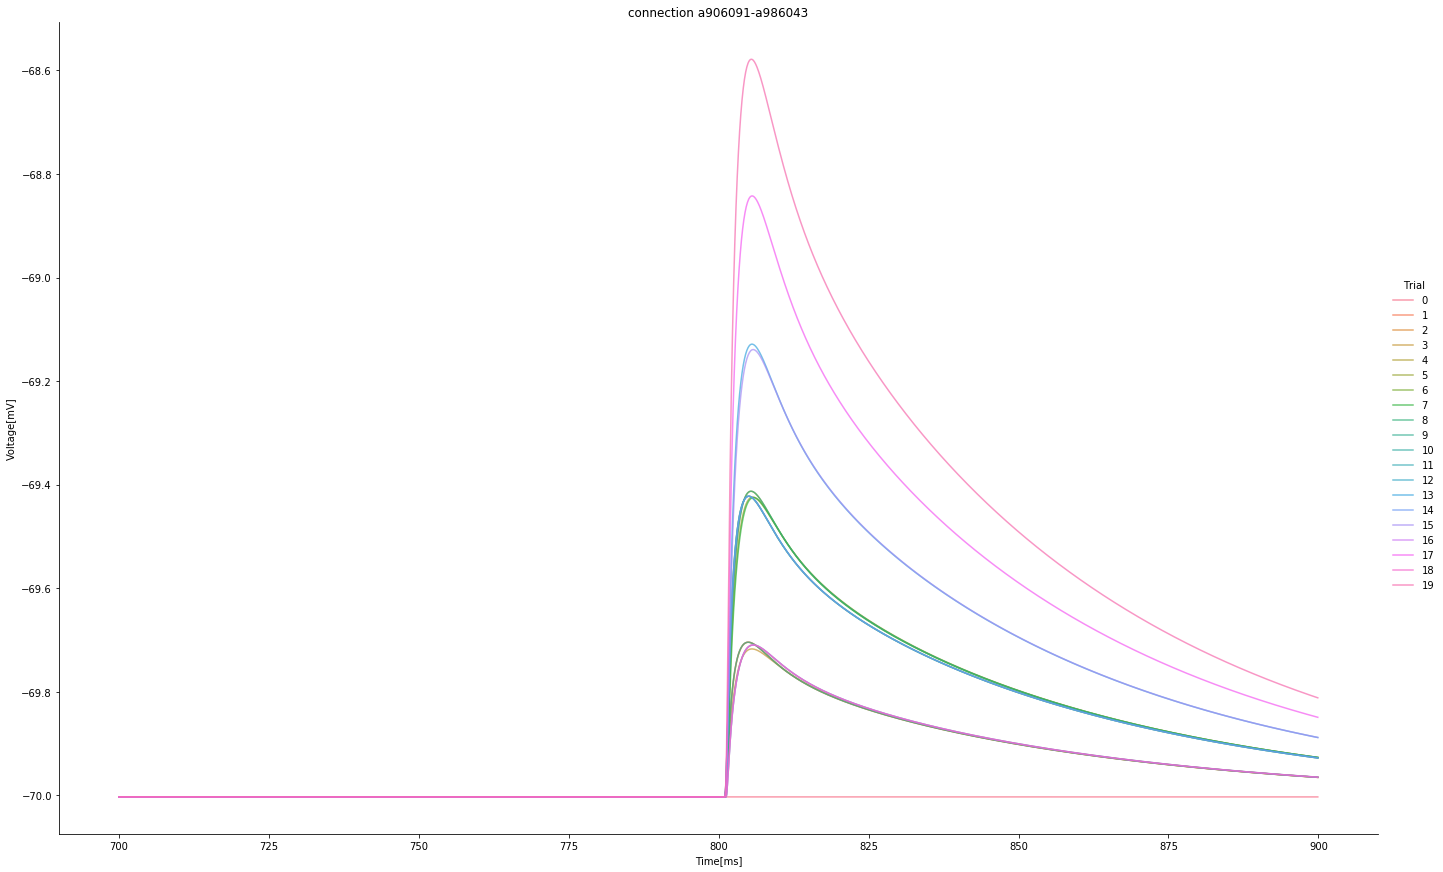

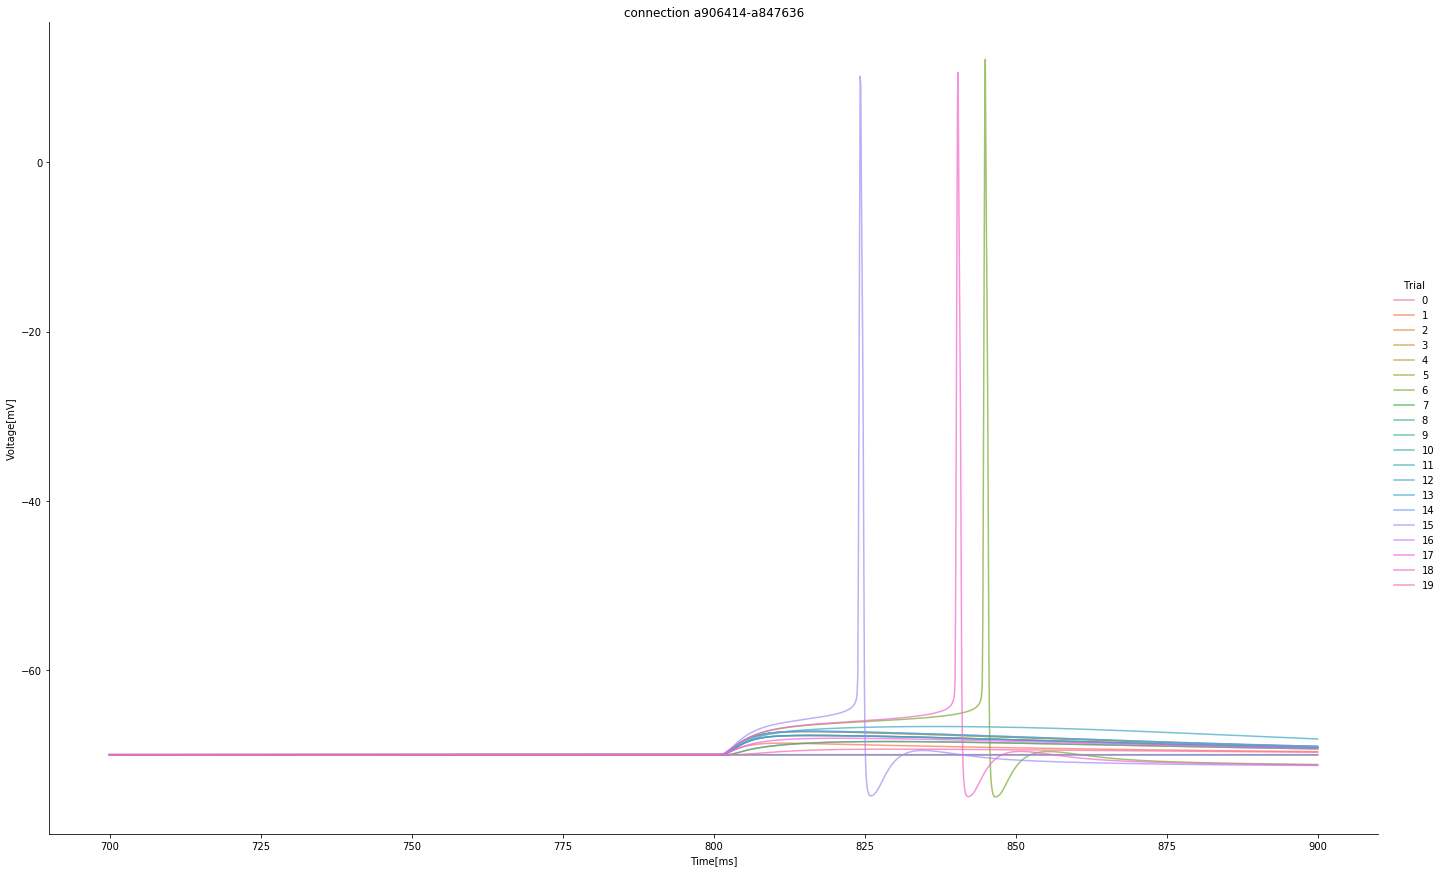

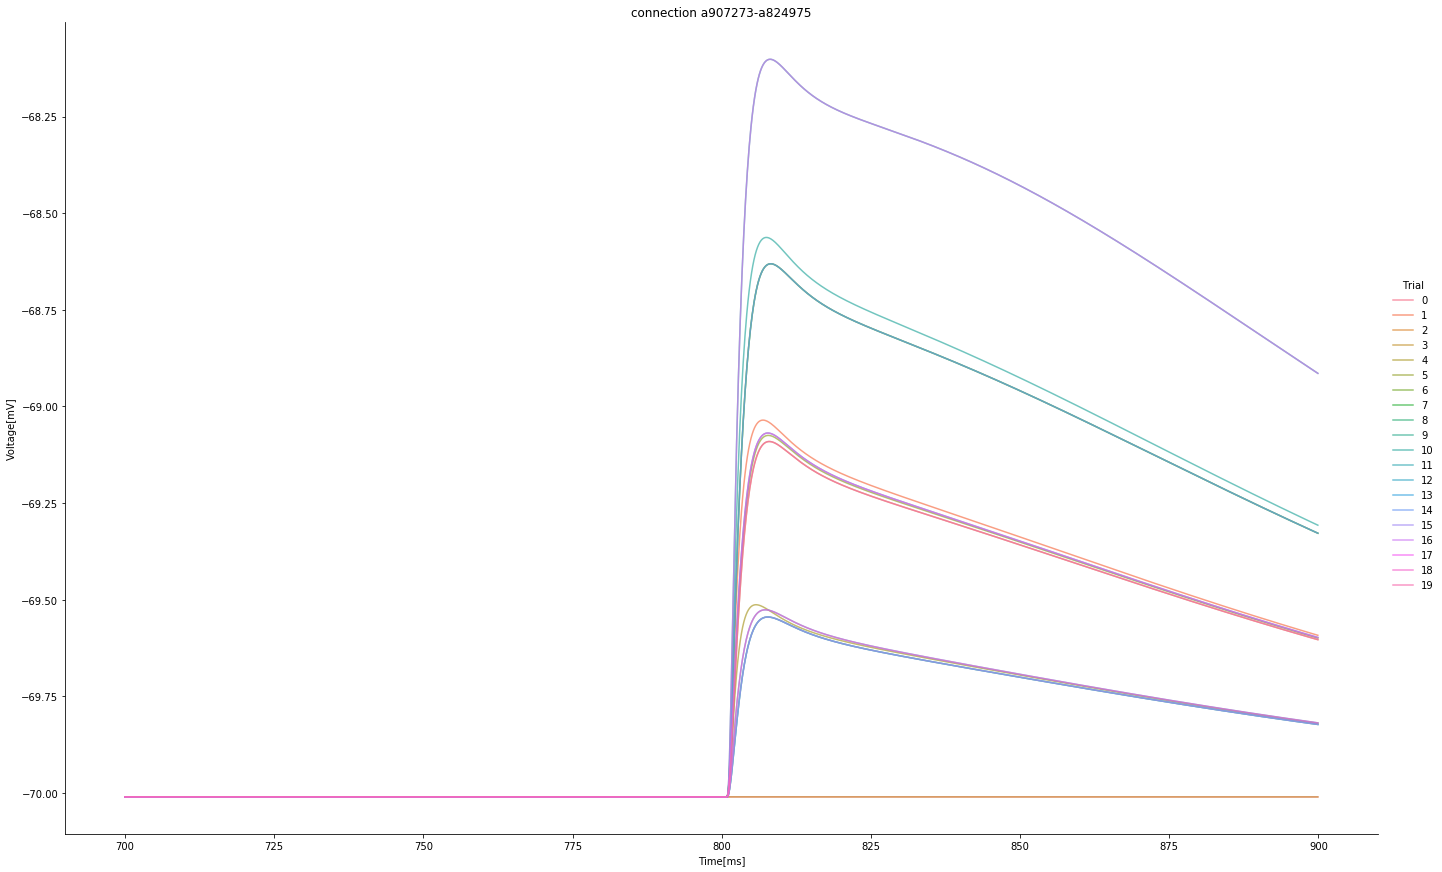

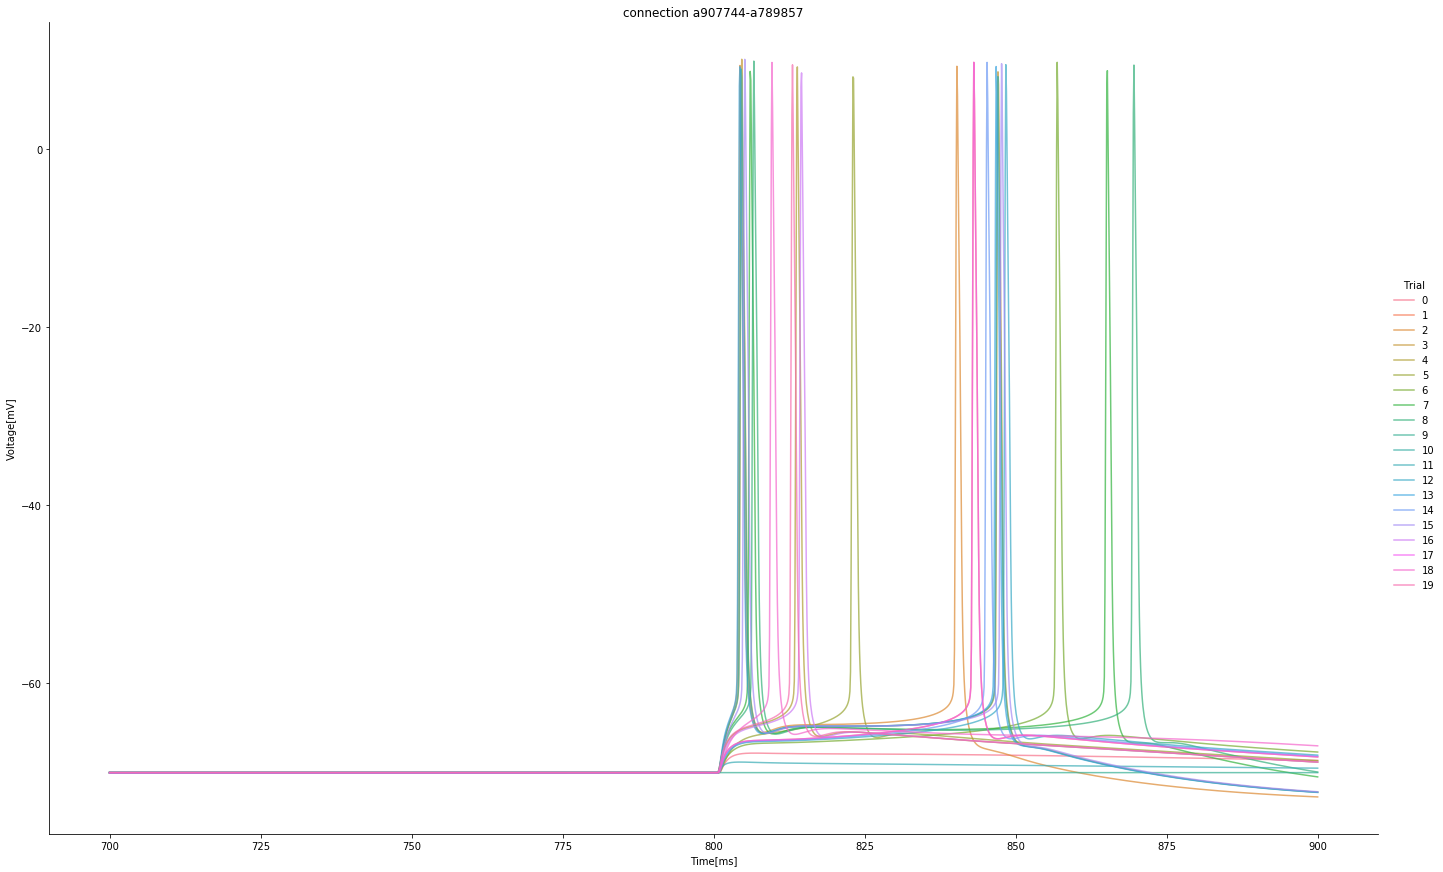

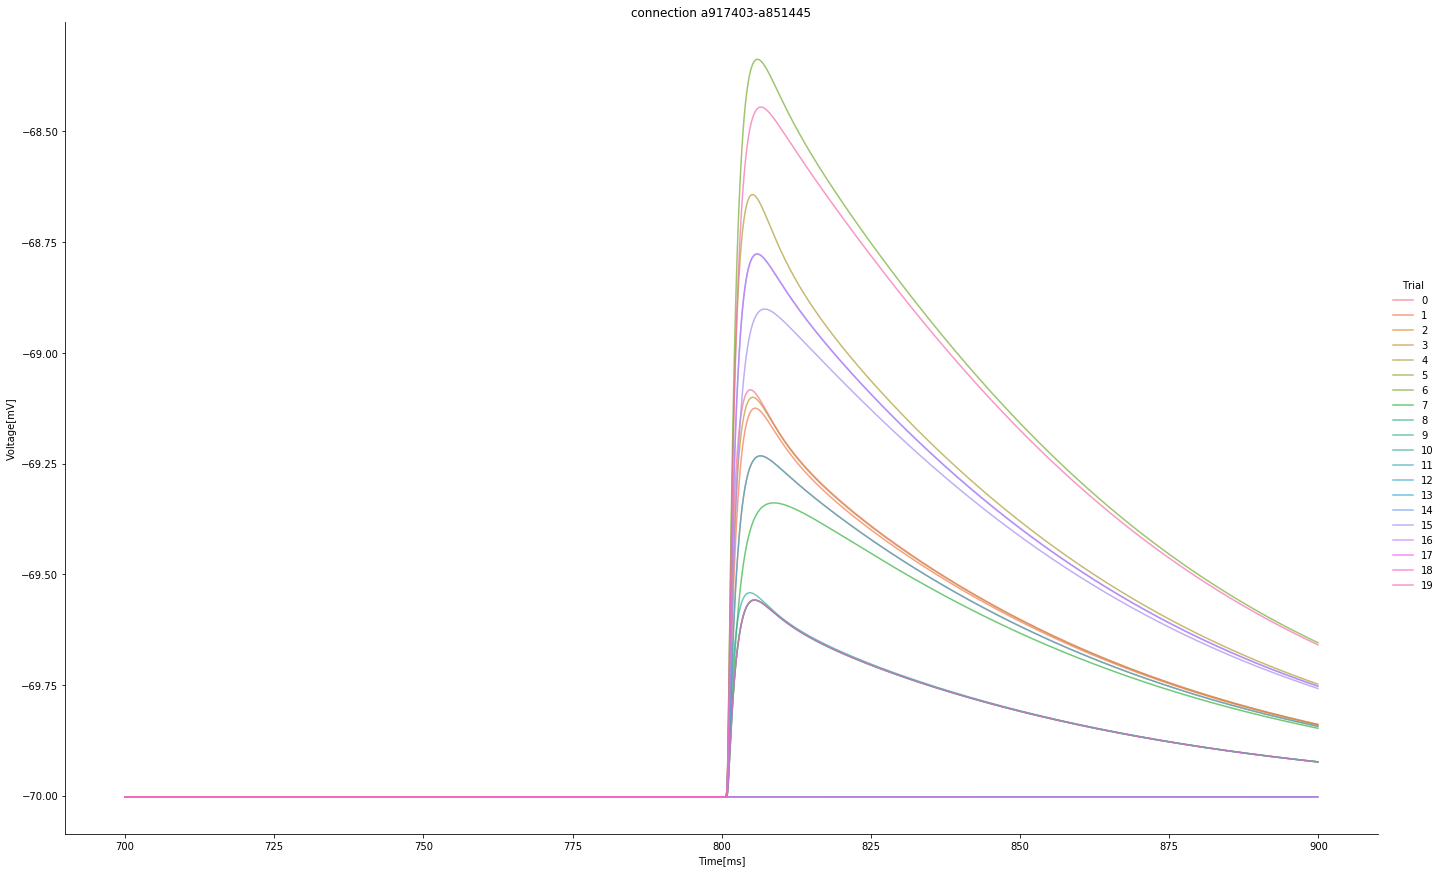

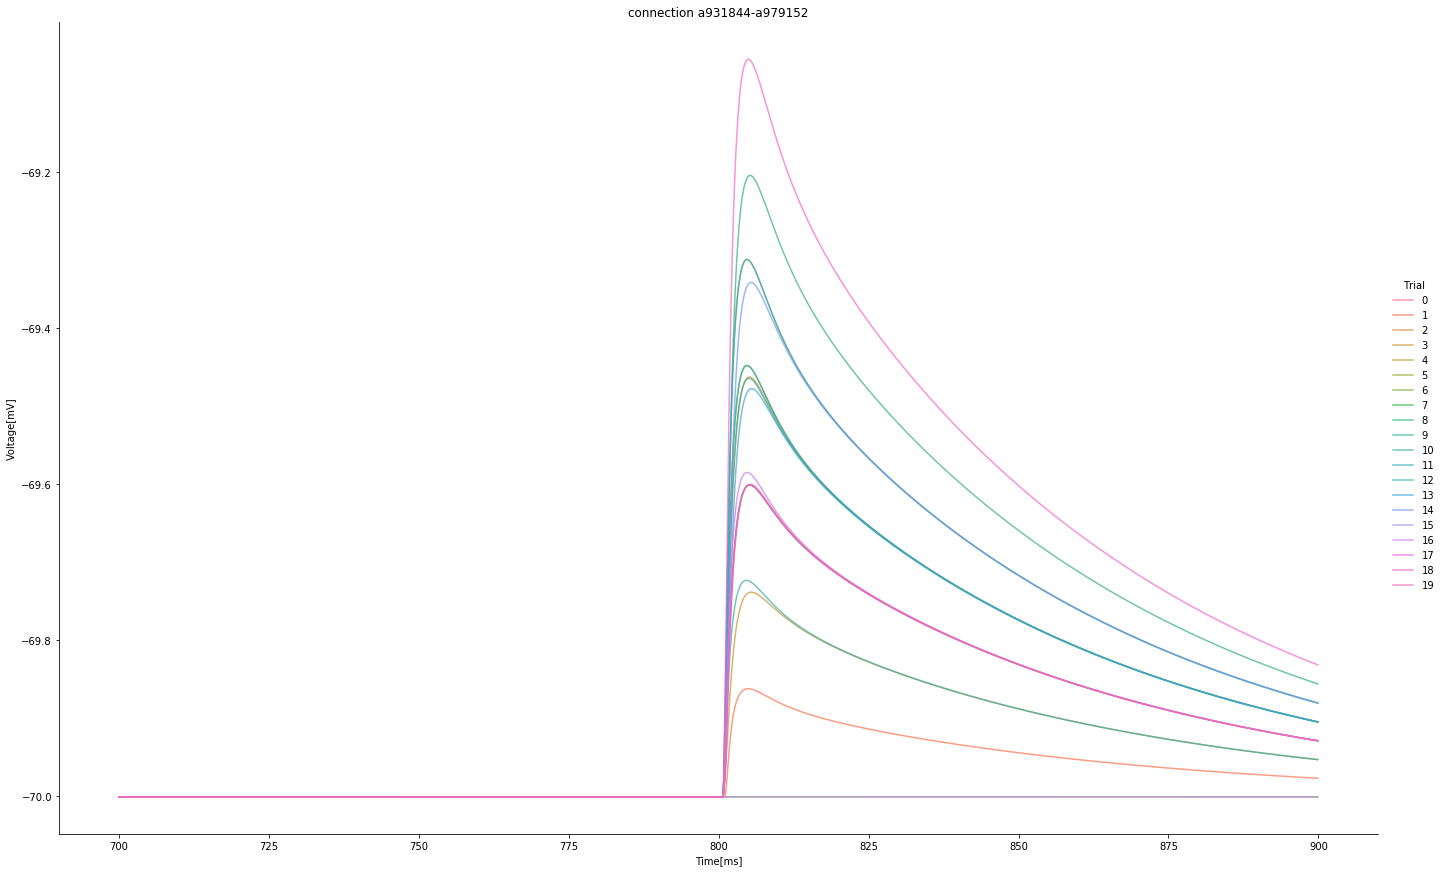

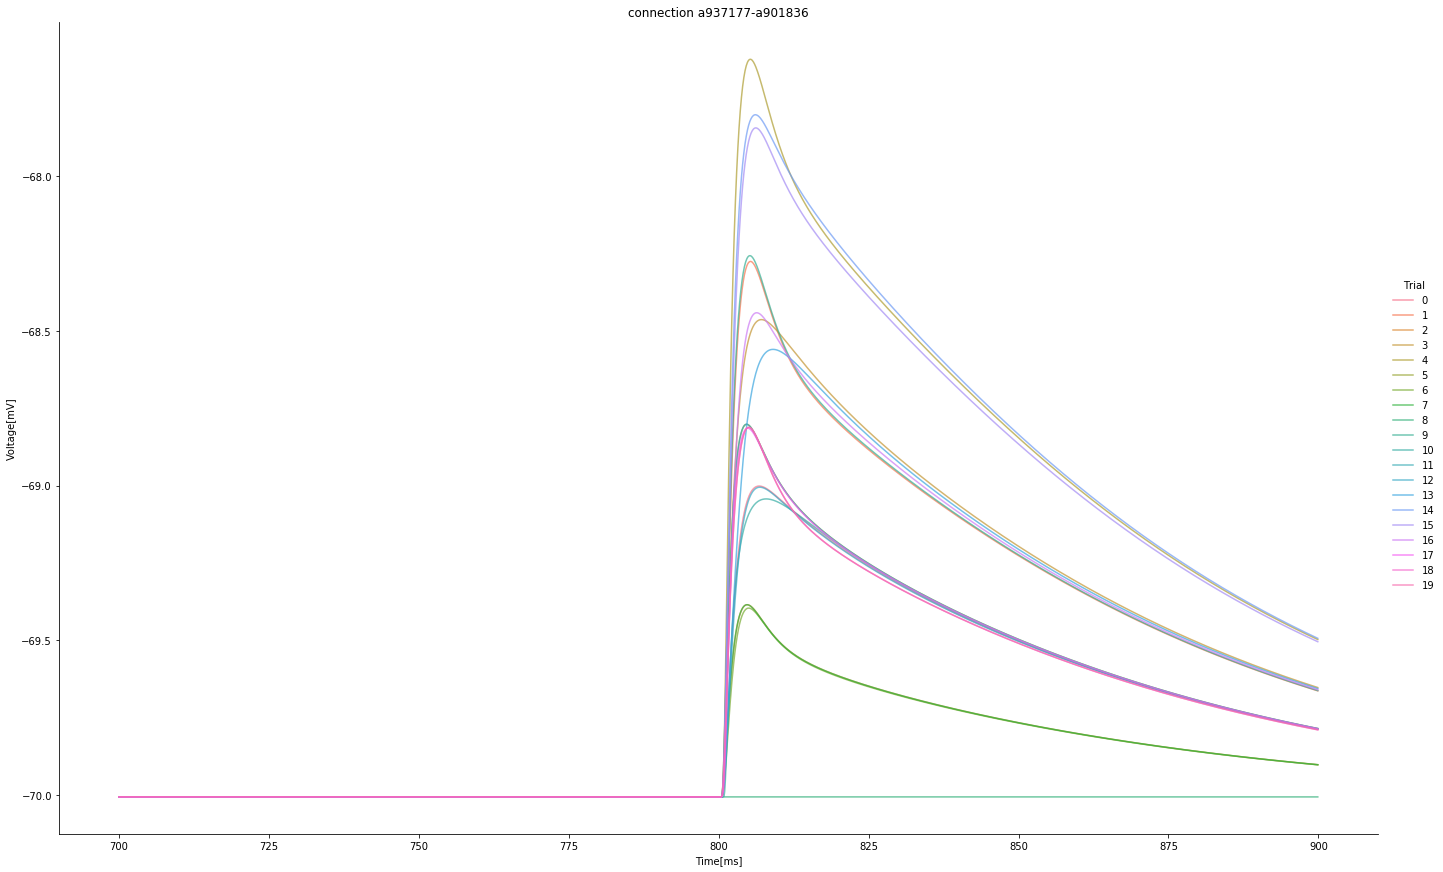

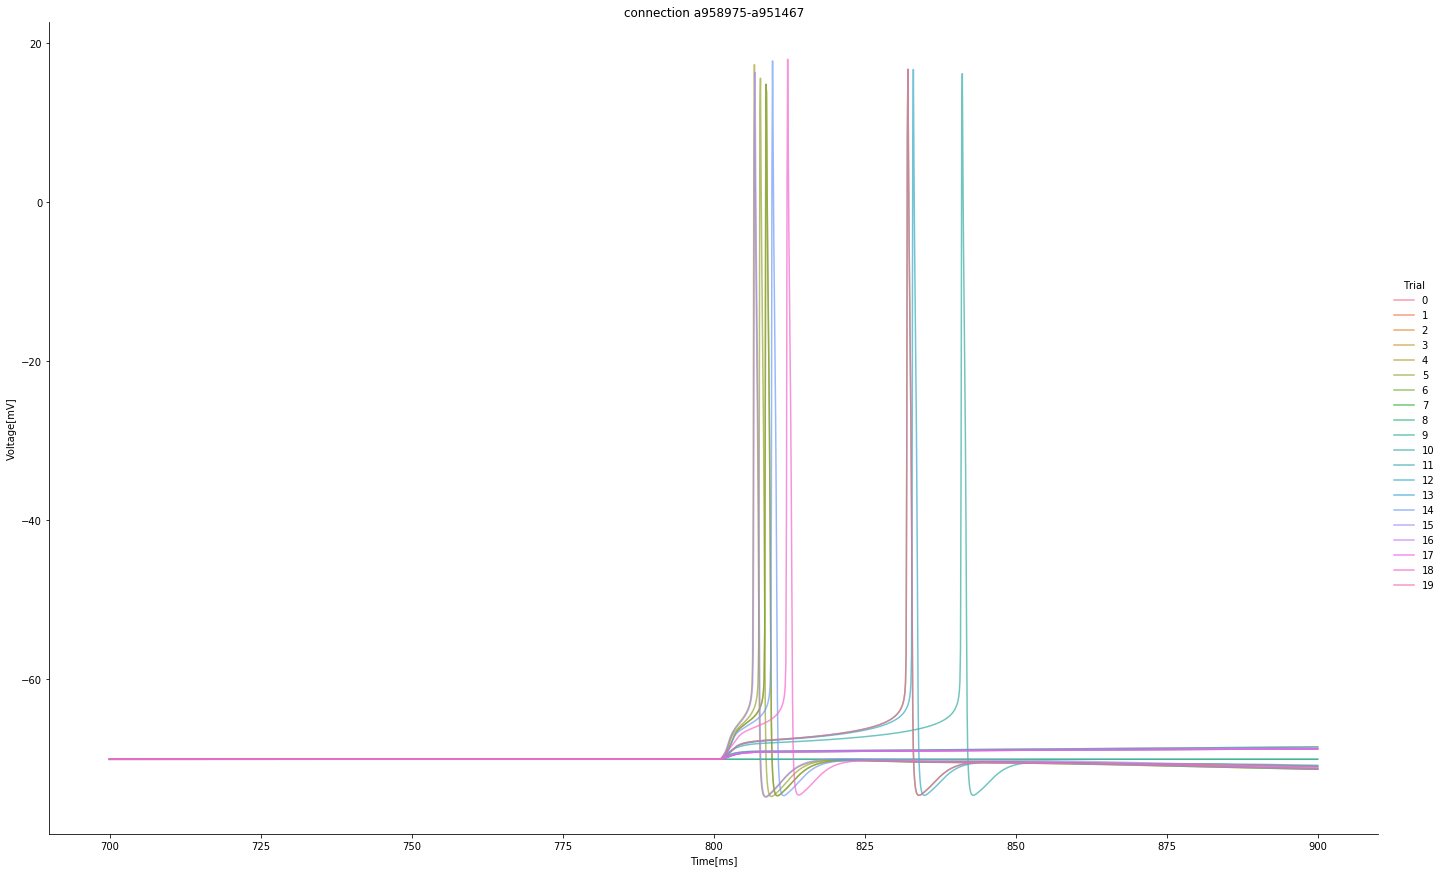

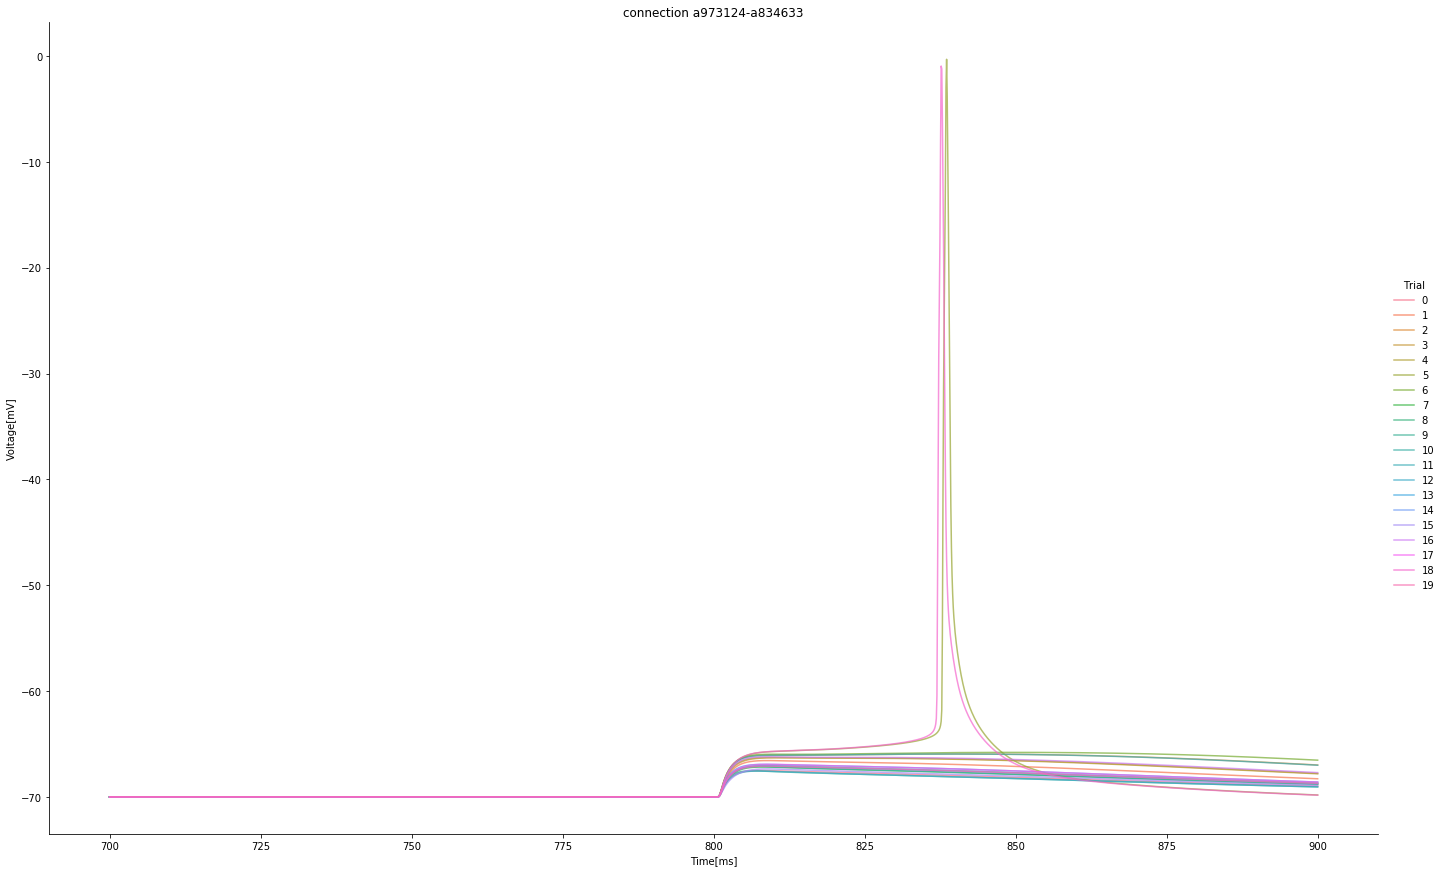

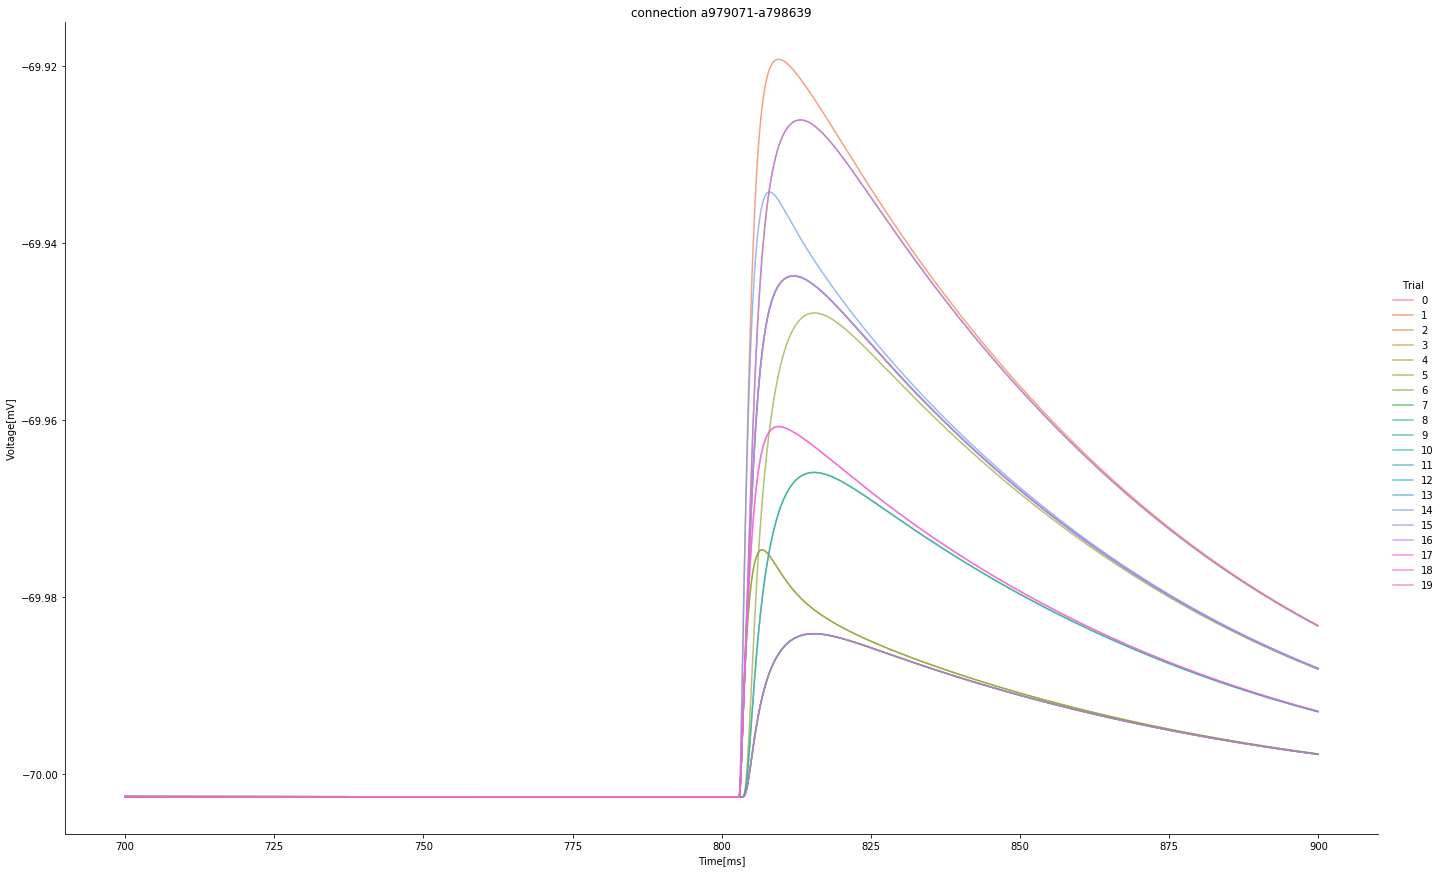

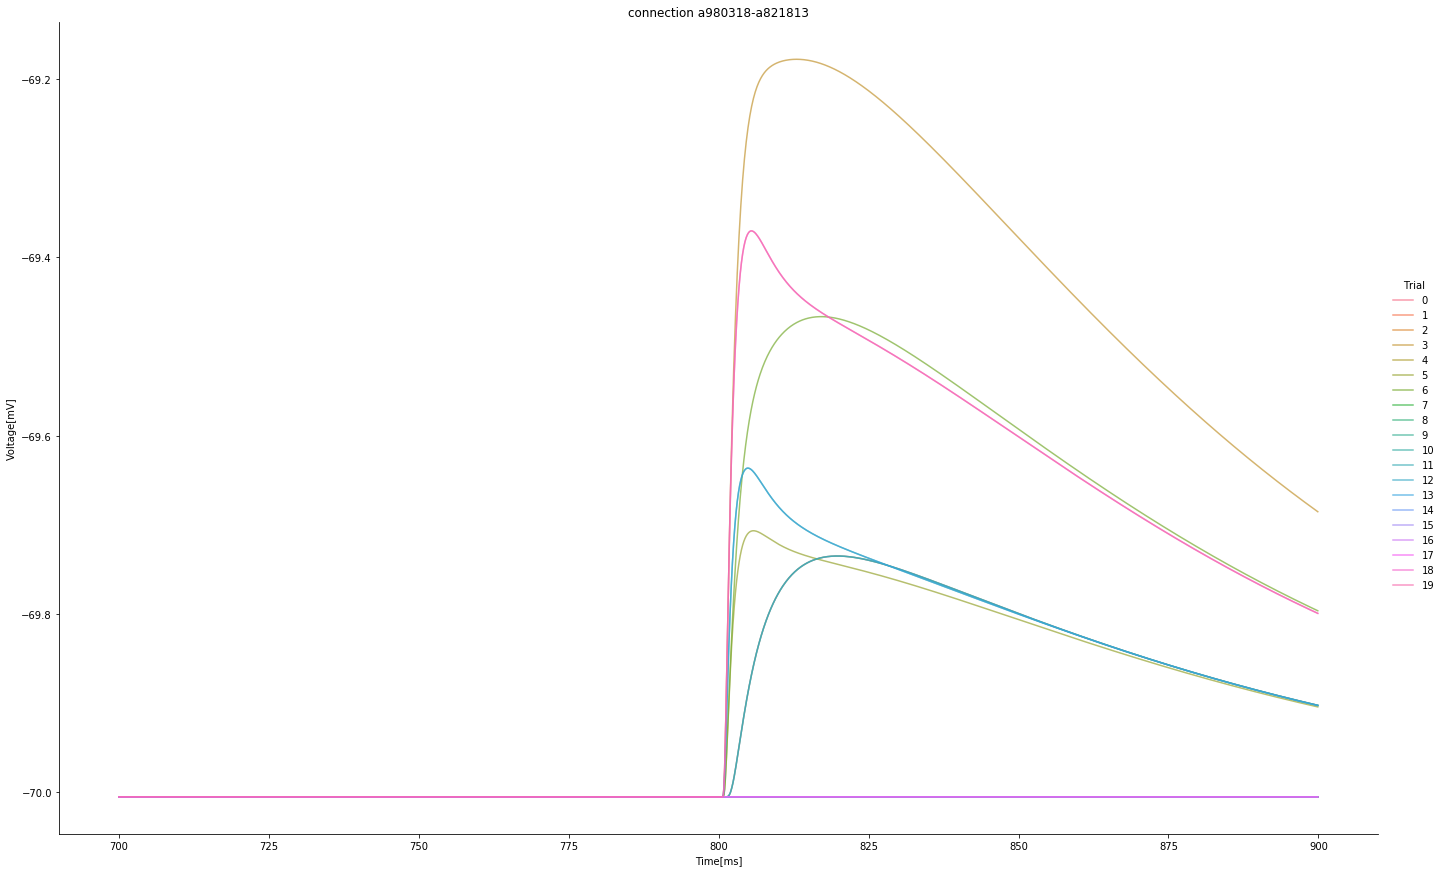

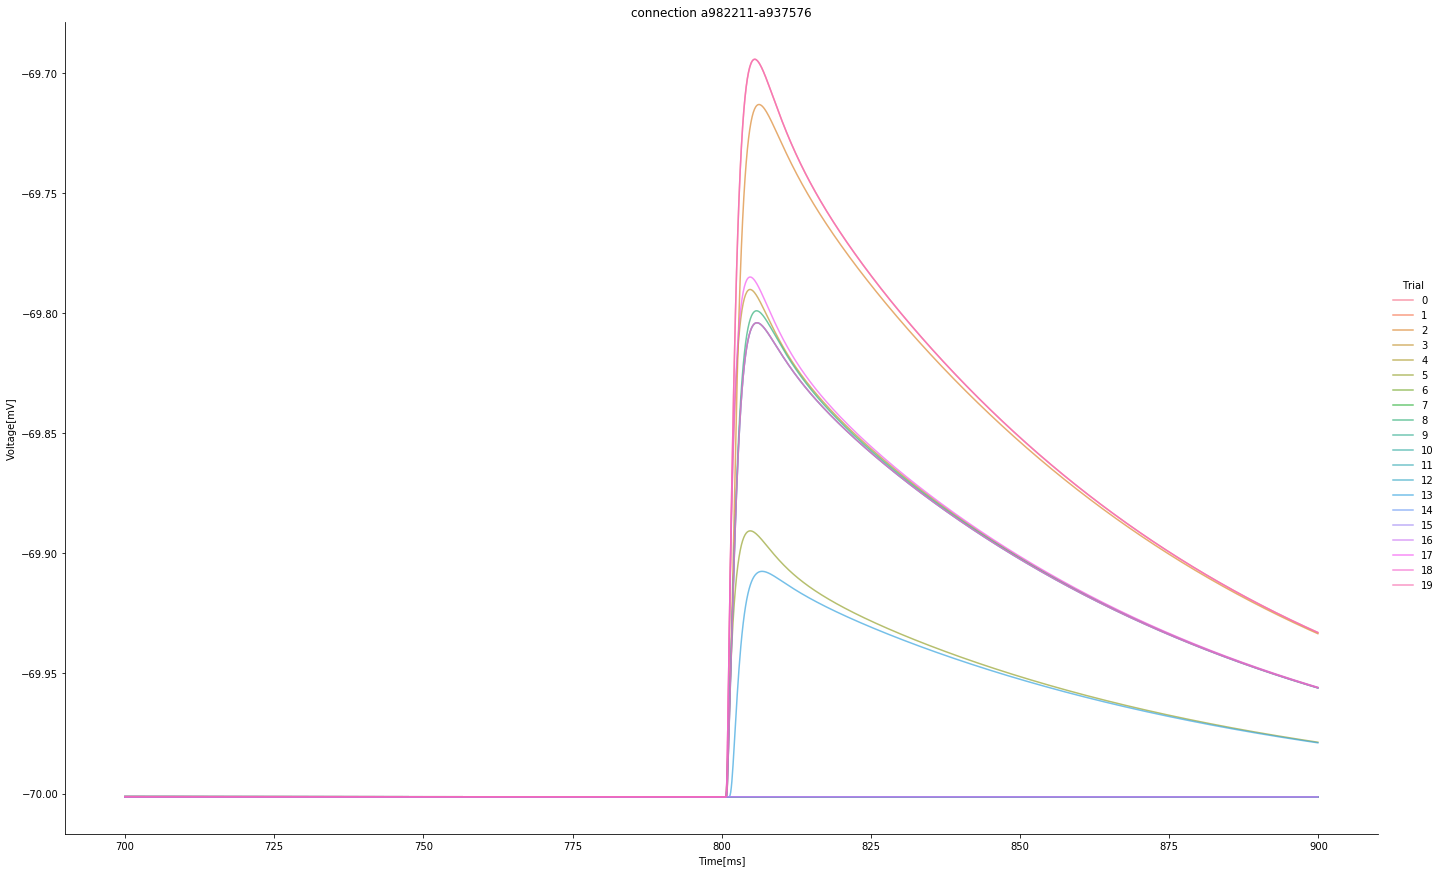

In [41]:
figures = plot_connection(connections)

In [114]:
def analysis_amplitudes(connection):
    """..."""
    traces_connection =\
        traces.loc[connection]
    
amplitudes =\
    traces.groupby(["connection", "trial"])\
          .agg("max")\
          .voltage
amplitudes.head(n=20)

connection       trial
a792930-a883944  0       -68.782470
                 1       -68.782470
                 2       -68.176421
                 3       -68.176421
                 4       -68.838145
                 5       -68.782470
                 6       -66.878554
                 7       -68.806219
                 8       -66.825188
                 9       -66.809201
                 10      -68.210388
                 11      -68.254653
                 12      -69.447554
                 13      -67.587150
                 14      -69.447554
                 15      -69.398886
                 16      -67.590842
                 17      -68.806219
                 18      -68.806813
                 19      -68.782470
Name: voltage, dtype: float64

In [95]:
quantiles =\
    np.linspace(0., 1., 5)
voltage_quantiles =\
    traces.groupby(["connection", "trial"])\
          .voltage\
          .apply(
              lambda ds: pd.Series(
                  ds.quantile(quantiles).values,
                  index=pd.Index(quantiles, name="quantile")))

In [157]:
jumps =\
    traces.groupby(["connection", "trial"])\
          .voltage\
          .apply(lambda voltage: pd.Series(voltage.values[1:] - voltage.values[:-1]))
jumps.groupby(["connection", "trial"])\
     .agg(["size", "mean", "std", "max"])

size          mean       std       max
connection      trial                                        
a792930-a883944 0      8999  2.614194e-05  0.002685  0.079196
                1      8999  2.614194e-05  0.002685  0.079196
                2      8999  4.447086e-05  0.003495  0.081625
                3      8999  4.447086e-05  0.003495  0.081625
                4      8999  2.608838e-05  0.002260  0.060505
...                     ...           ...       ...       ...
a982211-a937576 15     8999 -1.536774e-07  0.000088  0.005022
                16     8999 -1.536774e-07  0.000088  0.005022
                17     8999  4.916376e-06  0.000512  0.016799
                18     8999  7.453045e-06  0.000621  0.016806
                19     8999  4.888616e-06  0.000387  0.008921

[800 rows x 4 columns]

In [171]:
with_time_windows =\
    traces.assign(time_window=lambda df: np.floor(df.time.values / 10.))\
          .groupby(["connection", "trial", "time_window"])\
          .voltage\
          .agg(["mean", "std"])
print(with_time_windows.shape)
with_time_windows.head()

(72000, 2)


mean       std
connection      trial time_window                     
a792930-a883944 0     0.0         -69.980344  0.005753
                      1.0         -70.002921  0.007201
                      2.0         -70.022255  0.004008
                      3.0         -70.031256  0.001404
                      4.0         -70.033074  0.000248

In [137]:
amplitudes.head()
vs = np.linspace(-70, np.ceil(amplitudes.max()), 100)
connection = connections[0]
cdf =\
    pd.DataFrame([
        {"voltage": v,
        "connection": connection,
        "fraction": np.mean(amplitudes.loc[connection] > v)}
        for connection in connections
        for v in vs])\
      .set_index(["connection", "voltage"])

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize LinePlot with field-values
yvar: fraction
ylabel: Fraction trials
xvar: voltage
xlabel: Voltage
gvar: connection

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/tk/field/__init__.py Logger
DEBUGINFO@<2020-02-06 15:10:24>                                                 
Initialize Figure with field-values
graphic: <seaborn.axisgrid.FacetGrid object at 0x161a57510>
caption: Caption not provided



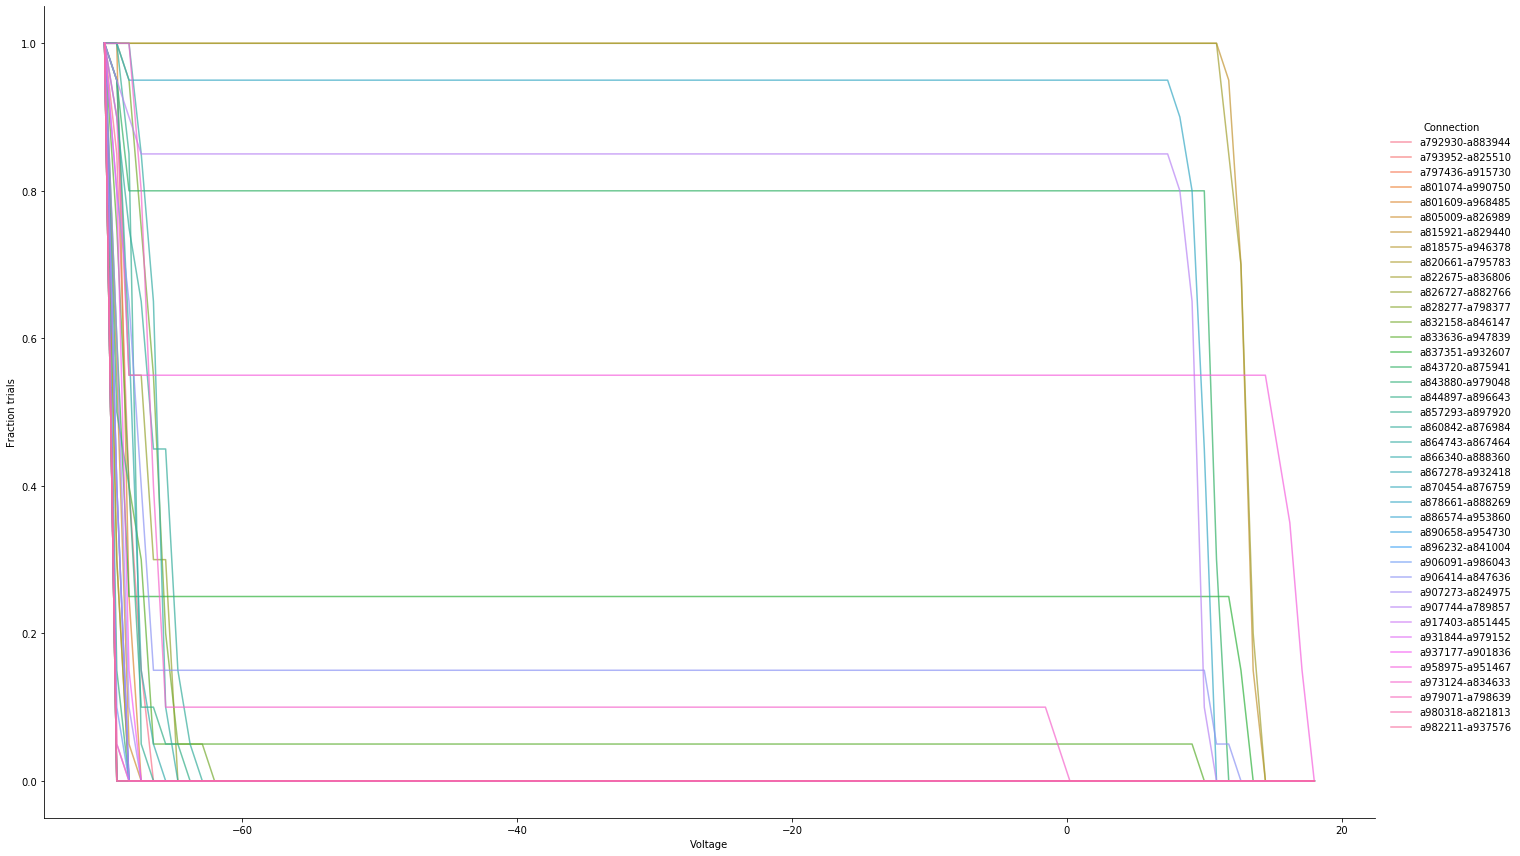

In [138]:
plotter_cdf =\
    LinePlot(
        yvar="fraction",
        ylabel="Fraction trials",
        xvar="voltage",
        xlabel="Voltage",
        gvar="connection")
figure_cdf =\
    plotter_cdf.get_figure(cdf)

In [268]:
hist_amps =\
    np.histogram(amplitudes.values, bins=20)
histogram_amplitudes =\
    pd.DataFrame({
        "amplitude": hist_amps[1][:-1],
        "count": hist_amps[0]})\
      .query("count > 0.")\
      .reset_index(drop=True)
      #.assign(jump=lambda df: df.bin_start.values[1:] - df.bin_start.values[0:])\
      #.set_index(["bin_start", "bin_end"])
print(histogram_amplitudes)
(histogram_amplitudes.iloc[1:].reset_index(drop=True)\
- histogram_amplitudes.iloc[0:-1].reset_index(drop=True))\
.rename(columns={"amplitude": "delta_amplitude"})

   amplitude  count
0 -69.989043    660
1 -65.590235     26
2  -4.006921      2
3   4.790695      7
4   9.189504     87
5  13.588312     18


delta_amplitude  count
0         4.398808   -634
1        61.583314    -24
2         8.797616      5
3         4.398808     80
4         4.398808    -69

In [230]:
xs = np.sort(amplitudes.values)
min_amp =\
    np.min(amplitudes.values)
print("minimum amplitude: ", min_amp)
hist_amps =\
    np.histogram(amplitudes.values - min_amp, bins=10)
bin_mids =\
    (hist_amps[1][1:] + hist_amps[1][:-1]) / 2.
print(hist_amps[0])
first_non_empty_bin =\
    np.where(hist_amps[0] > 0)[0][0]
print("first non empty bin", first_non_empty_bin)
print("first non empty bin voltage: ",
      hist_amps[1][first_non_empty_bin])
empty_bins =[
    b for b in np.where(hist_amps[0] == 0.)[0]
    if b > first_non_zero_bin]
print("empty bins: ", empty_bins)
print("empty bin voltages: ", hist_amps[1][empty_bins])
print(hist_amps[1])
print(bin_mids[zero_data_bins])
threshold_spiking =\
    hist_amps[1][np.min(zero_data_bins)]
threshold_spiking

minimum amplitude:  -69.98904270926661
[686   0   0   0   0   0   0   2   7 105]
first non empty bin 0
first non empty bin voltage:  0.0
empty bins:  [1, 2, 3, 4, 5, 6]
empty bin voltages:  [ 8.79761625 17.5952325  26.39284875 35.19046501 43.98808126 52.78569751]
[ 0.          8.79761625 17.5952325  26.39284875 35.19046501 43.98808126
 52.78569751 61.58331376 70.38093001 79.17854626 87.97616252]
[13.19642438 21.99404063 30.79165688 39.58927313 48.38688938 57.18450564]


8.797616251589142

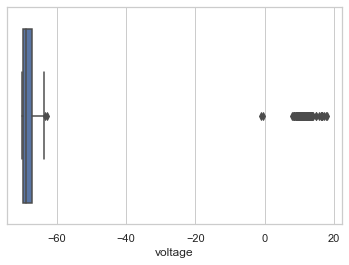

In [177]:
seaborn.set(style="whitegrid")
ax =\
    seaborn.boxplot(
        x="voltage",
        data=amplitudes.reset_index())

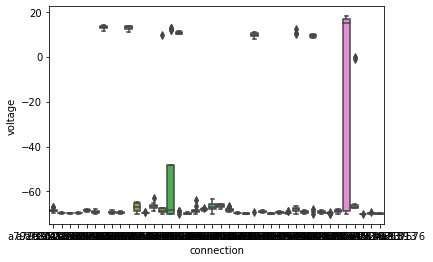

In [59]:
import seaborn
ax = seaborn.boxplot(
    x="connection",
    y="voltage",
    data=amplitudes.reset_index)()

In [55]:
connections = list(sim_l6tpc_l6tpc.connections)
raw_traces[connections[0]]["trials"].shape

def get_traces(cnxn):
    raw_traces_cnxn = raw_traces[cnxn]["trials"]
    index_time = 1
    index_voltage = 0
    number_trials, number_quantities, number_records =\
        raw_traces_cnxn.shape
    return\
        pd.concat([
            pd.DataFrame({
                "trial": trial,
                "record_step": range(number_records),
                "time": np.array(raw_traces_cnxn[trial, index_voltage, :]),
                "voltage": np.array(raw_traces_cnxn[trial, index_time, :])})
            for trial in range(number_trials)])

traces_cnxn_0 =\
    get_traces(connections[0])
print(traces_cnxn_0.shape)
traces_cnxn_0.head()

(180000, 4)


trial  record_step       time  voltage
0      0            0 -70.000000      0.0
1      0            1 -69.998396      0.1
2      0            2 -69.993785      0.2
3      0            3 -69.990011      0.3
4      0            4 -69.987052      0.4

In [257]:
summamp =\
    pspsim_model.simulation_data(pathways[0])\
                .summary_amplitude
pd.DataFrame([summamp.reference])
  .assign(pathway=pathways[0])

mean   std       pathway
reference   2.2  3.28  L6_TPC-L6_BC

In [ ]:
reference_data =\
    pd.concat([
        pd.DataFrame(
            [pspsim_model.simulation_data(p).reference])\
          .assign(pathway=p)
        for p in pspsim_model.pathways])\
      .reset_index()

In [4]:

# total time of the recording
SIMULATION_TIME = 1.3
fs = 1.0/0.0001
fs2 = 1.0/0.000025

# times where a stimulus is performed
# points
STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
# seconds
stim_times_s = [0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 1.0]
time_vitro = np.arange(0,1.3,0.0001)
# time in points before stimulus
t_wind_bef = 50
# time in points after stimulus
t_wind_aft = 200

# lists used in plots
STIM_NUM = [1,2,3,4,5,6,7,8,9]

# dictionary with tau_mem values for this specific data - computed with Tau_mem_computation function
TAU_MEM_EACH = {'c0':20.9, 'c1':19.1, 'c2':30.4, 'c4':32.9, 'c10':33.3, 'c12':35.5, 'c13':43.5, 'c14':41.2, 'c31':31.7, 'c59':28.6, 'c60':46.9, 'c61':31.6, 'c62':23.0, 'c63':22.7, 'c64':34.1, 'c65':18.4, 'c66':29.1, 'c67':22.0, 'c68':37.1, 'c69':53.9, 'c70':18.7, 'c71':37.5, 'c73':36.7, 'c74':25.0, 'c75':39.0, 'c76':26.2, 'c77':48.0, 'c78':43.8, 'c79':17.1, 'c80':25.1, 'c81':25.6, 'c82':62.3, 'c83':46.7}

# raw invitro data
raw_data = h5py.File(RAW_DATA_PATH)
list_key = TAU_MEM_EACH.keys()

OSError: Unable to create file (unable to open file: name = '/Users/natalibarros/Desktop/EPFL_BBP/MVR_warmupProject/Data_h5_files/invitro_raw.h5', errno = 2, error message = 'No such file or directory', flags = 15, o_flags = a02)

__FIT AN EXPONENTIAL IN THE DECAY PART OF THE RECOVERY PEAK -> COMPUTE TAU_MEM__

In [ ]:
from scipy.optimize import curve_fit

# we make a loop over all the connections in raw_data
#list_key = raw_data.keys()
# As an example - only compute for one connection
#list_key = ['c2']

for con_num in list_key:
    #tranpose the data to fit in the fuction
    sample_connection = np.transpose(raw_data[con_num].value)
    
    #compute the mean trace
    sample_mean = np.mean(sample_connection, axis = 0)
    
    # select the last EPSP (recovery peak) and compute the peak (max)
    WINDOW = 1000 # WARNING: This parameter can change the output of the fitting
    last_peak_curve = np.ndarray.tolist(sample_mean[STIM_TIMES[8]:STIM_TIMES[8]+WINDOW])
    peak_value = np.max(last_peak_curve)
    peak_value_index = last_peak_curve.index(peak_value)
    
    # select only the decay curve to be fitted
    curve_to_fit = last_peak_curve[peak_value_index:]
    
    # build x axis
    x = np.arange(peak_value_index,len(curve_to_fit)+peak_value_index,1)
    
    # compute the fitting curve and Tau_mem
    popt, pcov, func, Tau_mem = at.compute_TauMem(x, curve_to_fit)
    
    # Tau_mem in ms
    TAU_MEM = Tau_mem*10.0 # This factor is necesary because our sampling frequency is 10kHz
    
    plt.figure()
    plt.plot(sample_mean)
    
    plt.figure()
    plt.title('recovery peak')
    plt.plot(last_peak_curve)
    
    plt.figure()
    plt.title('curve to be fit')
    plt.plot(curve_to_fit)
    
    plt.figure()
    plt.title('fitting')
    plt.plot(x, curve_to_fit, 'b-')
    plt.plot(x, at.func(x, *popt), 'r--')


__COMPUTE LATENCY, TAU_RISE AND AMPLITUDE OF FIRST EPSP__

In [ ]:
# Store the results from each connection into lists
first_EPSP_amp = []
TAU_rise = []
latency = []

# pre_AP should be the time of the presynaptic AP. But I don't have this value so I used first stim time
pre_AP = STIM_TIMES[0]/10000.0 

# we make a loop over all the connections in raw_data
#list_key = raw_data.keys()
# As an example - only compute for one connection
list_key = ['c31']

for con_num in list_key:
    sample_connection = np.transpose(raw_data[con_num].value)

    EPSP_amp, tau_rise, lat = at.amp_rise_lat_firstEPSP(sample_connection, STIM_TIMES, time_vitro, t_wind_bef, t_wind_aft, pre_AP, PLOT=True)

    first_EPSP_amp.append(EPSP_amp)
    TAU_rise.append(tau_rise)
    latency.append(lat)

print 'MEAN amplitude (mV)', np.mean(first_EPSP_amp)*1000.0
print 'STD amplitude (mV)', np.std(first_EPSP_amp)*1000.0
print 'MAX amplitude (mV)', np.max(first_EPSP_amp)*1000.0
print 'MIN amplitude (mV)', np.min(first_EPSP_amp)*1000.0

print 'MEAN tau_rise (ms)', np.mean(TAU_rise)
print 'STD tau_rise (ms)', np.std(TAU_rise)
print 'MAX tau_rise (ms)', np.max(TAU_rise)
print 'MIN tau_rise (ms)', np.min(TAU_rise)

print 'MEAN latency (ms)', np.mean(latency)
print 'STD latency (ms)', np.std(latency)
print 'MAX latency (ms)', np.max(latency)
print 'MIN latency (ms)', np.min(latency)

__COMPUTE FAILURES__

In [ ]:
# Compute failure rate as Markram et al., 1997
list_key = raw_data.keys()

FAILS = []
AMPS = []
for con_num in list_key:
    sample_connection = np.transpose(raw_data[con_num].value)
    mean = np.mean(sample_connection, axis = 0)
    norm = at.Normalize_trace(mean)

    MAX, MIN, AMP = at.compute_amplitude(mean, STIM_TIMES, t_wind_bef,t_wind_aft)

    AMP_scl = [a*1000.0 for a in AMP]

    failures = at.Failures(sample_connection, STIM_TIMES, t_wind_bef, t_wind_aft)

    FAILS = FAILS + failures
    AMPS = AMPS + AMP_scl

plt.xlabel('EPSP amplitude (mV)')
plt.ylabel('Failure (%)')
plt.plot(AMPS, FAILS, 'o')

__RUN DECONVOLVE TRACE AND COMPUTE U, D AND F__

Fitting TM model -  connection: c14
derivative...
Generation: 0
Generation: 50
Generation: 100
Generation: 150
Generation: 200
Generation: 250
Generation: 300
Generation: 350
Generation: 400
Generation: 450
connection c14
U =  0.285577264398
D =  282.191672216
F =  0.000969903433787
fitting 0.000525486242632
U = nan Ustd = nan
D = nan Dstd = nan
F = nan Fstd = nan


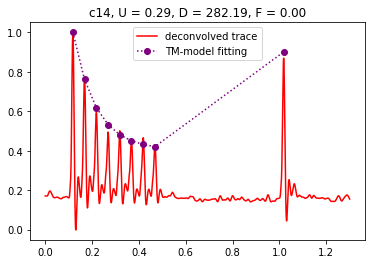

In [7]:
# To make this analysis properly, we should build a loop and safe each time the fitting value.
# Then we find the mimnimum fitting value and the correspondent U, D and F.
import UDF_GeneticAlgorithm

# For the example:
list_key = ['c14']

#list_key = raw_data.keys()

# we make a loop over all the connections in raw_data
U_data = []
D_data = []
F_data = []
fit_data =[]
for con_num in list_key:
    # we want to avoid some ugly connections
    if (con_num == 'c7' or con_num == 'c11' or con_num == 'c9'):
        pass
    else:
        U_loop = []
        D_loop = []
        F_loop = []
        fitting_loop =[]
        # for loop.... best fitting
        print 'Fitting TM model -  connection: %s' %con_num
        sample_connection = np.transpose(raw_data[con_num].value)

        # compute mean trace
        mean_t = np.mean(sample_connection, axis=0)

        # filt mean trace
        filt_mean_t = at.butter_lowpass_filter(mean_t - mean_t[0], 50, fs, order=5)

        # deconvolve filtered mean trace
        Rin = 180.0*10**6
        TAU_MEM = TAU_MEM_EACH[con_num]*10.0
        dec_filt_mean_t = at.deconvolver(filt_mean_t, Rin, TAU_MEM)

        # normalize deconvolved trace
        max_dec_filt_mean_t = np.max(dec_filt_mean_t[1000:1300])
        min_dec_filt_mean_t = np.min(dec_filt_mean_t[1000:1300])
        dec_filt_mean_t_norm = (dec_filt_mean_t - min_dec_filt_mean_t) / (max_dec_filt_mean_t - min_dec_filt_mean_t)

        # compute peaks for normalized trace
        dec_peaks, dec_peaks_time = at.compute_peaks(dec_filt_mean_t_norm, STIM_TIMES, t_wind_aft)
        
        #for iter in range(0,2):
        #    print 'ITERATION %s' %iter

            # U, D and F estimation from peaks
        UDF_GeneticAlgorithm.EXPERIMENTAL = dec_peaks
        club = UDF_GeneticAlgorithm.main_ga()

        U = club[0]
        F = club[1]
        D = club[2]
        fit = club[3]
    
        #    # the last element of the list club is the fitting value that gives an estimation of the
        #    # fitting quality
        #    U_loop.append(U)
        #    D_loop.append(D)
        #    F_loop.append(F)
        #    fitting_loop.append(fit)
        #    #print fitting_loop

        # Let's find the value with the minimum fitting value
        #fitting_min = np.min(fitting_loop)
        #for i in range(0, 2):
        #    if fitting_loop[i] == fitting_min:
        #        print 'fitting_loop min', fitting_loop[i]
        #        U = U_loop[i]
        #        D = D_loop[i]
        #        F = F_loop[i]
        #    else:
        #        pass

        print 'connection %s' %con_num
        print 'U = ', U
        print 'D = ', D
        print 'F = ', F
        print 'fitting', fit

        #U_data.append(U)
        #D_data.append(D)
        #F_data.append(F)
        #fit_data.append(fitting_min)
         
        m_distance, sim_peaks = at.compute_fitness(U, F, D, dec_peaks)
    
        # PLOT the deconvolved trace and the points obtained from the TM-model fitting
        plt.figure()
        plt.title('%s, U = %.2f, D = %.2f, F = %.2f' %(con_num,U,D,F))
        plt.plot(time_vitro, dec_filt_mean_t_norm, label = 'deconvolved trace', color = 'red', linestyle = '-')
        plt.plot(dec_peaks_time, sim_peaks, label = 'TM-model fitting', color = 'purple', marker = 'o', linestyle = ':')
        plt.legend()

print 'U =', np.mean(U_data), 'Ustd =', np.std(U_data)
print 'D =', np.mean(D_data), 'Dstd =', np.std(D_data)
print 'F =', np.mean(F_data), 'Fstd =', np.std(F_data)

__COMPUTE Coeficient of variation of the EPSP amplitudes applying the Jack Knife approach__

In [ ]:
CV = []

for con_num in list_key:
    '''' pick a sample connection by name (ie: 'c60') '''''
    sample_connection = raw_data[con_num].value
    sample_connection = np.transpose(sample_connection)
    amp, cv = at.cv_JKK(sample_connection, STIM_TIMES, 50, 300)
    CV.append(cv)

CV_mean = np.mean(CV, axis=0)
CV_std = np.std(CV, axis=0)

plt.xlabel('stimulus index')
plt.ylabel('CV')
plt.plot(STIM_NUM, CV_mean, 'ro')
plt.plot(STIM_NUM, CV_mean, 'b--')
